<a href="https://colab.research.google.com/github/kaantemel/CS310-Project/blob/main/CS210_Group76_FinalReport.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [New York City Airbnb Prices - ID:76]

Group Members:

Kaan Temel ID: 27745

Yavuz Berkay Altınok ID: 28301

Irmak Özügüzel ID:28258

Bensu Çelik ID:26663

## Introduction

<font color="blue">

- By analyzing several datasets we will determine  which **Airbnb** is best suited to a guest and their needs. We will be looking at **location**, **crime rates** in the area, **reviews** of previous customers whom evaluated their experience on **Airbnb**’s homestay based on the conditions of the house and service of the host, and most importantly their **prices**. 

- Furthermore we will report this data to the user by **visualizing** important datasets, their similarities and differences. Likewise relationships of qualities important for the guests satisfaction.

- As a result, users of Airbnb will be able to **choose** the most suitable accomodation for them, along with the best **value** price ratio.

</font>

### Utilized Datasets

<font color="blue">

1. [Main Dataset](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data)

This dataset consist of information on the registered hosts in New York City and their assocaited attributes. Dataset includes the location, prices,reviews, room types, the occupancy and the availability during the year. 
Observing the visualisations of the datasets we should find correlations between features so that we can predict and conduct our project.

2. [Complaint](https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Current-Year-To-Date-/5uac-w243)

In this data set, it is given us a list of criminal complaints in NYC which consist of all valid felony, misdemeanor, and violation crimes that are reported to the New York City Police Department (NYPD) for the current calendar year which are extracted every quarter.

3. [A list of important Poi's](https://data.cityofnewyork.us/Health/Places/mzbd-kucq)

This data set contains approximately 100 points of interest in New York City. Dataset indicates that there is a correlation between proximity to the points of interest locations and the preffered Airbnb’s since they are generally more useful or interesting for the people.

4. [Bus Stop Locations](https://data.cityofnewyork.us/Transportation/Bus-Stop-Shelters/qafz-7myz)

This data set consist of the locations of Bus Stop Shelters in NYC provided by New York City Department of Transportation. Dataset shows us a parallelism between the bus stop shelters and Airbnb locations. Both are concentrated on similar locations.

5. [Subway Locations](https://data.cityofnewyork.us/Transportation/Subway-Stations/arq3-7z49)

This data set contains the locations of subway stations in NYC provided by Metropolitan Transportation Authority(MTA). We take this into consideration because a higher number of subway stations that are built around the area of the airbnb would mean it would be more convenient for guests to attend to their needs.

</font>

## Exploratory Data Analysis



In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

path_prefix = "/content/drive/My Drive"

Mounted at /content/drive


In [ ]:
import pandas as pd  # an alias for pandas
import numpy as np
import matplotlib.pyplot as plt
import folium
from os.path import join

# displaying option


%matplotlib inline

### Main Dataset

In [ ]:
fname = "AB_NYC_2019.csv"
df = pd.read_csv(join(path_prefix, fname))

df.head()

id  ... availability_365
0  2539  ...              365
1  2595  ...              355
2  3647  ...              365
3  3831  ...              194
4  5022  ...                0

[5 rows x 16 columns]

Deleting the missing values in columns "name" and "host_name" since they can be ignored

In [ ]:
df.dropna(axis="index", how="any", subset=["name"],inplace = True)
df.dropna(axis="index", how="any", subset=["host_name"],inplace = True)

df.isna().sum()


id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10037
reviews_per_month                 10037
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Replacing the missing values in "reviews per month" with the mean of the column

In [ ]:

df["reviews_per_month"].dtype
df["reviews_per_month"].fillna(df["reviews_per_month"].astype(float).mean(), inplace = True)
df.isna().sum()
df["reviews_per_month"].mean()

1.3732291800831393

In [ ]:
df.isna().sum()


id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10037
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Deleting the "last_review" column since it is irrelevant to the project

In [ ]:
df.drop(["last_review"], axis = 1, inplace = True)
df.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

### Complaint Additional Dataset

In [ ]:
fname_2 = "NYPD_Complaint_Data_Current__Year_To_Date_.csv"

complaint_df = pd.read_csv(join(path_prefix, fname_2))

complaint_df.head()


CMPLNT_NUM  ...                      New Georeferenced Column
0   885776788  ...  POINT (-73.99141682199996 40.62576896100006)
1   350637195  ...  POINT (-73.93022154099998 40.67458330800008)
2   347843168  ...  POINT (-73.86969046099993 40.82310129900002)
3   197941396  ...  POINT (-73.84760778699997 40.88745131300004)
4   298404927  ...  POINT (-73.93084834199995 40.80022202900005)

[5 rows x 36 columns]

In [ ]:
df.describe()

id  ...  availability_365
count  4.885800e+04  ...      48858.000000
mean   1.902335e+07  ...        112.801425
std    1.098289e+07  ...        131.610962
min    2.539000e+03  ...          0.000000
25%    9.475980e+06  ...          0.000000
50%    1.969114e+07  ...         45.000000
75%    2.915765e+07  ...        227.000000
max    3.648724e+07  ...        365.000000

[8 rows x 10 columns]

In [ ]:
complaint_df.isna().sum()

CMPLNT_NUM                       0
ADDR_PCT_CD                      0
BORO_NM                        485
CMPLNT_FR_DT                     0
CMPLNT_FR_TM                     0
CMPLNT_TO_DT                 39104
CMPLNT_TO_TM                 38979
CRM_ATPT_CPTD_CD                 0
HADEVELOPT                  411842
HOUSING_PSA                 382445
JURISDICTION_CODE              463
JURIS_DESC                       0
KY_CD                            0
LAW_CAT_CD                       0
LOC_OF_OCCUR_DESC            66086
OFNS_DESC                        6
PARKS_NM                    410736
PATROL_BORO                    463
PD_CD                          463
PD_DESC                        463
PREM_TYP_DESC                 1172
RPT_DT                           0
STATION_NAME                406179
SUSP_AGE_GROUP               94862
SUSP_RACE                    94862
SUSP_SEX                     94862
TRANSIT_DISTRICT            406179
VIC_AGE_GROUP                    1
VIC_RACE            

Deleting the irrelevant columns

In [ ]:
complaint_df.drop(["CMPLNT_NUM"], axis = 1, inplace = True)
complaint_df.drop(["ADDR_PCT_CD"], axis = 1, inplace = True)
complaint_df.drop(["CMPLNT_FR_DT"], axis = 1, inplace = True)
complaint_df.drop(["CMPLNT_FR_TM"], axis = 1, inplace = True)
complaint_df.drop(["CMPLNT_TO_DT"], axis = 1, inplace = True)
complaint_df.drop(["CMPLNT_TO_TM"], axis = 1, inplace = True)
complaint_df.drop(["CRM_ATPT_CPTD_CD"], axis = 1, inplace = True)
complaint_df.drop(["HADEVELOPT"], axis = 1, inplace = True)
complaint_df.drop(["HOUSING_PSA"], axis = 1, inplace = True)
complaint_df.drop(["JURISDICTION_CODE"], axis = 1, inplace = True)
complaint_df.drop(["JURIS_DESC"], axis = 1, inplace = True)
complaint_df.drop(["KY_CD"], axis = 1, inplace = True)
complaint_df.drop(["LAW_CAT_CD"], axis = 1, inplace = True)
complaint_df.drop(["LOC_OF_OCCUR_DESC"], axis = 1, inplace = True)
complaint_df.drop(["OFNS_DESC"], axis = 1, inplace = True)
complaint_df.drop(["PARKS_NM"], axis = 1, inplace = True)
complaint_df.drop(["PATROL_BORO"], axis = 1, inplace = True)
complaint_df.drop(["PD_CD"], axis = 1, inplace = True)
complaint_df.drop(["PD_DESC"], axis = 1, inplace = True)
complaint_df.drop(["PREM_TYP_DESC"], axis = 1, inplace = True)
complaint_df.drop(["RPT_DT"], axis = 1, inplace = True)
complaint_df.drop(["STATION_NAME"], axis = 1, inplace = True)
complaint_df.drop(["SUSP_AGE_GROUP"], axis = 1, inplace = True)
complaint_df.drop(["SUSP_RACE"], axis = 1, inplace = True)
complaint_df.drop(["SUSP_SEX"], axis = 1, inplace = True)
complaint_df.drop(["TRANSIT_DISTRICT"], axis = 1, inplace = True)
complaint_df.drop(["VIC_AGE_GROUP"], axis = 1, inplace = True)
complaint_df.drop(["VIC_RACE"], axis = 1, inplace = True)
complaint_df.drop(["VIC_SEX"], axis = 1, inplace = True)



In [ ]:
complaint_df.isna().sum()

BORO_NM                     485
X_COORD_CD                    0
Y_COORD_CD                    0
Latitude                      0
Longitude                     0
Lat_Lon                       0
New Georeferenced Column      0
dtype: int64

Deleting the missing values of "BORO_NM" from the dataset

In [ ]:
complaint_df.dropna(axis="index", how="any", subset=["BORO_NM"],inplace = True)



*   Finding the number of Airbnb locations in each neighbourhood
*   Finding the average price of Airbnbs in each neighbourhood 




In [ ]:
numdict={}
complaint_df.iloc[1,0]
for a in range(len(complaint_df)):
  if complaint_df.iloc[a,0] in numdict:
    numdict[complaint_df.iloc[a,0]]+=1
  else:
    numdict[complaint_df.iloc[a,0]]=1
print(numdict)
totalofbronx=0
totalofqueens=0
totalofmanhattan=0
totalofbrooklyn=0
totalofstatenisland=0
countofbronx=0
countofqueens=0
countofmanhattan=0
countofbrooklyn=0
countofstatenisland=0
for b in range(len(df)):
  if df.iloc[b,4]=='Brooklyn':
    totalofbrooklyn+=df.iloc[b,9]
    countofbrooklyn+=1
  if df.iloc[b,4]=='Manhattan':
    totalofmanhattan+=df.iloc[b,9]
    countofmanhattan+=1
  if df.iloc[b,4]=='Bronx':
    totalofbronx+=df.iloc[b,9]
    countofbronx+=1
  if df.iloc[b,4]=='Queens':
    totalofqueens+=df.iloc[b,9]
    countofqueens+=1
  if df.iloc[b,4]=='Staten Island':
    totalofstatenisland+=df.iloc[b,9]
    countofstatenisland+=1
avaragepricedict={'Bronx':(totalofbronx/countofbronx) ,'Manhattan':totalofmanhattan/countofmanhattan, 'Brooklyn':totalofbrooklyn/countofbrooklyn, 'Staten Island': totalofstatenisland/countofstatenisland, 'Queens': totalofqueens/countofqueens}
print(avaragepricedict)



{'BRONX': 90446, 'QUEENS': 88922, 'MANHATTAN': 97365, 'BROOKLYN': 119208, 'STATEN ISLAND': 16986}
{'Bronx': 87.4692378328742, 'Manhattan': 196.8974726239431, 'Brooklyn': 124.41052317188512, 'Staten Island': 114.81233243967829, 'Queens': 99.53601694915254}


In [ ]:
complaint_df.isna().sum()
complaint_df.head()

BORO_NM  ...                       New Georeferenced Column
2    BRONX  ...   POINT (-73.86969046099993 40.82310129900002)
37   BRONX  ...   POINT (-73.89631577699998 40.86704639800007)
51   BRONX  ...   POINT (-73.88058161799995 40.82847901700006)
58   BRONX  ...  POINT (-73.86786488599995 40.865428146000056)
77  QUEENS  ...   POINT (-73.79151948999998 40.72535311000007)

[5 rows x 7 columns]

### POIs Additional Dataset

In [ ]:
fname_3 = "Areas_of_Interest_Centroids.csv"

poi_df = pd.read_csv(join(path_prefix, fname_3))

poi_df.head()

the_geom  OBJECTID  ...  AnnoLine2a Angle
0    POINT (-73.88895811640342 40.8962098695574)         1  ...   Cortlandt     0
1   POINT (-73.87165102682086 40.88987947152594)         2  ...    Cemetery     0
2    POINT (-73.8386418872537 40.88696522165708)         3  ...       Falls     0
3   POINT (-73.80980242290379 40.87798554992497)         4  ...         Bay     0
4  POINT (-73.87830775950145 40.864423947038276)         5  ...      Garden     0

[5 rows x 11 columns]

In [ ]:
poi_df.isna().sum()

the_geom       0
OBJECTID       0
Id             0
Name           0
Stacked        0
AnnoLine1      0
AnnoLine3     64
Borough        0
AnnoLine4     94
AnnoLine2a     4
Angle          0
dtype: int64

Deleting the columns "Annoline3", "Annoline4" and "Angle" since they are irrelevant

In [ ]:
poi_df.drop(["AnnoLine3"], axis = 1, inplace = True)
poi_df.drop(["AnnoLine4"], axis = 1, inplace = True)
poi_df.drop(["Angle"], axis = 1, inplace = True)

In [ ]:
poi_df.head()

the_geom  OBJECTID  ...  Borough AnnoLine2a
0    POINT (-73.88895811640342 40.8962098695574)         1  ...    Bronx  Cortlandt
1   POINT (-73.87165102682086 40.88987947152594)         2  ...    Bronx   Cemetery
2    POINT (-73.8386418872537 40.88696522165708)         3  ...    Bronx      Falls
3   POINT (-73.80980242290379 40.87798554992497)         4  ...    Bronx        Bay
4  POINT (-73.87830775950145 40.864423947038276)         5  ...    Bronx     Garden

[5 rows x 8 columns]

Finding the total number of POIs in each neighbourhood

In [ ]:
totalpoiofbronx=0
totalpoiofqueens=0
totalpoiofmanhattan=0
totalpoiofbrooklyn=0
totalpoiofstatenisland=0
for b in range(len(poi_df)):
  if poi_df.iloc[b,6]=='Brooklyn':
    totalpoiofbrooklyn+=1
  if poi_df.iloc[b,6]=='Manhattan':
    totalpoiofmanhattan+=1
  if poi_df.iloc[b,6]=='Bronx':
    totalpoiofbronx+=1
  if poi_df.iloc[b,6]=='Queens':
    totalpoiofqueens+=1
  if poi_df.iloc[b,6]=='Staten Island':
    totalpoiofstatenisland+=1
poidict={'Bronx':totalpoiofbronx ,'Manhattan':totalpoiofmanhattan, 'Brooklyn':totalpoiofbrooklyn, 'Staten Island': totalpoiofstatenisland, 'Queens': totalpoiofqueens}
print(poidict)

{'Bronx': 15, 'Manhattan': 13, 'Brooklyn': 18, 'Staten Island': 16, 'Queens': 34}


### Bus Additional Dataset

In [ ]:
fname_4 = "Bus_Stop_Shelter.csv"
bus_df = pd.read_csv(join(path_prefix, fname_4))
bus_df.head()

CounDist  BoroCD  AssemDist  ... SegmentID  PhysicalID  NODEID
0        34     301         53  ...   31244.0       91546       0
1        34     301         50  ...   35598.0       45754       0
2        34     301         53  ...   31350.0       43972   19920
3        34     301         50  ...   65844.0       48893   40551
4        35     302         50  ...   30196.0       60512       0

[5 rows x 18 columns]

In [ ]:
bus_df.drop(["CounDist"], axis = 1, inplace = True)
bus_df.drop(["BoroCD"], axis = 1, inplace = True)
bus_df.drop(["AssemDist"], axis = 1, inplace = True)
bus_df.drop(["CongDist"], axis = 1, inplace = True)
bus_df.drop(["StSenDist"], axis = 1, inplace = True)
bus_df.drop(["SHELTER_ID"], axis = 1, inplace = True)
bus_df.drop(["AT_BETWEEN"], axis = 1, inplace = True)
bus_df.drop(["AssetID"], axis = 1, inplace = True)
bus_df.drop(["BoroCode"], axis = 1, inplace = True)
bus_df.drop(["SegmentID"], axis = 1, inplace = True)
bus_df.drop(["PhysicalID"], axis = 1, inplace = True)
bus_df.drop(["NODEID"], axis = 1, inplace = True)

In [ ]:
bus_df.dropna(axis="index", how="any", subset=["Street"],inplace = True)
bus_df.isna().sum()

the_geom     0
LOCATION     0
LONGITUDE    0
LATITUDE     0
BoroName     0
Street       0
dtype: int64

Finding the total number of stations in each neighbourhood

In [ ]:
totalbusofbronx=0
totalbusofqueens=0
totalbusofmanhattan=0
totalbusofbrooklyn=0
totalbusofstatenisland=0
for b in range(len(bus_df)):
  if bus_df.iloc[b,4]=='Brooklyn':
    totalbusofbrooklyn+=1
  if bus_df.iloc[b,4]=='Manhattan':
    totalbusofmanhattan+=1
  if bus_df.iloc[b,4]=='Bronx':
    totalbusofbronx+=1
  if bus_df.iloc[b,4]=='Queens':
    totalbusofqueens+=1
  if bus_df.iloc[b,4]=='Staten Island':
    totalbusofstatenisland+=1
busdict={'Bronx':totalbusofbronx ,'Manhattan':totalbusofmanhattan, 'Brooklyn':totalbusofbrooklyn, 'Staten Island': totalbusofstatenisland, 'Queens': totalbusofqueens}
print(busdict)

{'Bronx': 576, 'Manhattan': 753, 'Brooklyn': 894, 'Staten Island': 215, 'Queens': 986}


###Subway Additional Dataset

In [ ]:
fname_5 = "DOITT_SUBWAY_STATION_01_13SEPT2010.csv"
subway_df = pd.read_csv(join(path_prefix, fname_5))
subway_df.head()

URL  ...                                              NOTES
0  http://web.mta.info/nyct/service/  ...  4 nights, 6-all times, 6 Express-weekdays AM s...
1  http://web.mta.info/nyct/service/  ...  4 nights, 6-all times, 6 Express-weekdays AM s...
2  http://web.mta.info/nyct/service/  ...                              1-all times, 2-nights
3  http://web.mta.info/nyct/service/  ...           4-nights, 3-all other times, 2-all times
4  http://web.mta.info/nyct/service/  ...                        4-nights, 3-all other times

[5 rows x 6 columns]

Deleting the columns "URL", "OBJECTID", "NAME", "LINE", "NOTES" since they are irrelevant.

In [ ]:
subway_df.drop(["URL"], axis = 1, inplace = True)
subway_df.drop(["OBJECTID"], axis = 1, inplace = True)
subway_df.drop(["LINE"], axis = 1, inplace = True)
subway_df.drop(["NOTES"], axis = 1, inplace = True)

In [ ]:
subway_df.head()

NAME                                      the_geom
0          Astor Pl  POINT (-73.99106999861966 40.73005400028978)
1          Canal St  POINT (-74.00019299927328 40.71880300107709)
2           50th St  POINT (-73.98384899986625 40.76172799961419)
3         Bergen St  POINT (-73.97499915116808 40.68086213682956)
4  Pennsylvania Ave  POINT (-73.89488591154061 40.66471445143568)

Text(0, 0.5, 'Price')

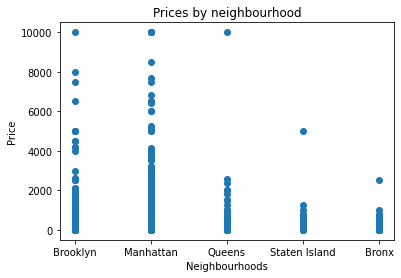

In [ ]:
plt.scatter(df["neighbourhood_group"], df["price"])
plt.title("Prices by neighbourhood")
plt.xlabel("Neighbourhoods")
plt.ylabel("Price")

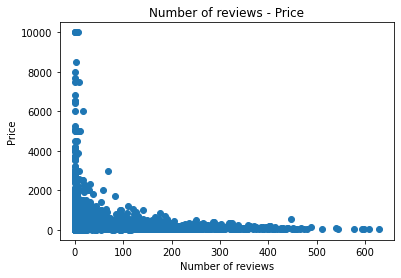

In [ ]:
plt.scatter(df["number_of_reviews"], df["price"])
plt.title("Number of reviews - Price")
plt.xlabel("Number of reviews")
plt.ylabel("Price")

plt.show()

[90446, 88922, 97365, 119208, 16986]
['BRONX', 'QUEENS', 'MANHATTAN', 'BROOKLYN', 'STATEN ISLAND']


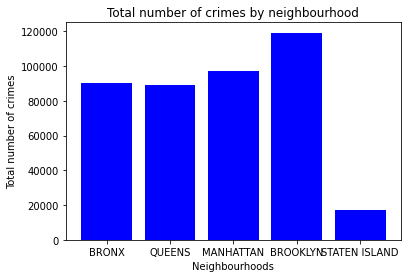

In [ ]:
crime_number = []
for i in numdict:
  crime_number.append(numdict[i])
print (crime_number)
neighbourhood = []

for i in numdict:
  neighbourhood.append(i)
print(neighbourhood)



plt.bar(neighbourhood, crime_number, color='blue')
plt.xlabel("Neighbourhoods")
plt.ylabel("Total number of crimes")
plt.title("Total number of crimes by neighbourhood")

plt.show()

Below you can see the correlations between the elements of the main dataset

Text(0.5, 1.0, 'Correlation Matrix')

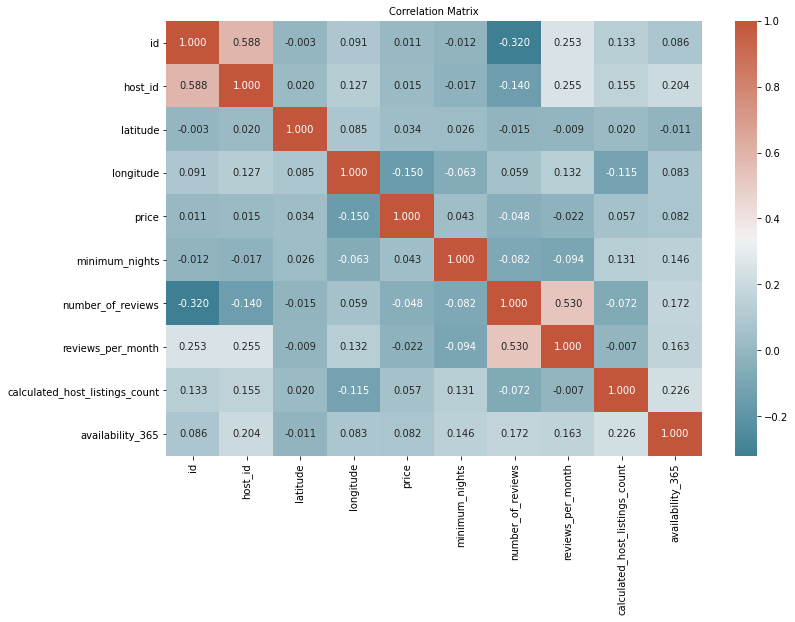

In [ ]:
import seaborn as sns
plt.figure(figsize=(12, 8))
palette = sns.diverging_palette(220, 20, as_cmap=True)
corr = df.corr(method ='pearson')
sns.heatmap(corr, annot=True,fmt=".3f", cmap=palette)
plt.title("Correlation Matrix",size =10)

Location of subways

In [ ]:
import folium
m = folium.Map(location=[40.7389509,-74.0464677])

for i in range(len(subway_df)):
  text = subway_df.iloc[i, 1]
  b= text.split(" ")
  longtitude = b[1]
  longtitude = longtitude[1:]
  latitude = b[2]
  latitude = latitude[:-1]
  longtitude = float(longtitude)
  latitude = float(latitude)
  tooltip = subway_df.iloc[i, 0]
  folium.Marker([latitude, longtitude], popup='<i>some content</i>', tooltip=tooltip).add_to(m)

m

In [ ]:
from folium.plugins import HeatMap
import folium
m = folium.Map(location=[40.7389509,-74.0464677], zoom_start=12, width=1000, height=500, tiles = "Stamen Terrain")


# extract coordinates

locs = df[["latitude", "longitude"]].dropna(how="any").values
# feed it to heatmap function
HeatMap(locs).add_to(m)

for i in range(len(subway_df)):
  text = subway_df.iloc[i, 1]
  b= text.split(" ")
  longtitude = b[1]
  longtitude = longtitude[1:]
  latitude = b[2]
  latitude = latitude[:-1]
  longtitude = float(longtitude)
  latitude = float(latitude)
  tooltip = subway_df.iloc[i, 0]
  folium.Marker([latitude, longtitude], popup='<i>some content</i>', tooltip=tooltip).add_to(m)

m

Locations of POIs

In [ ]:
import folium
m = folium.Map(location=[40.7389509,-74.0464677])

for i in range(len(poi_df)):
  text = poi_df.iloc[i, 0]
  b= text.split(" ")
  longtitude = b[1]
  longtitude = longtitude[1:]
  latitude = b[2]
  latitude = latitude[:-1]
  longtitude = float(longtitude)
  latitude = float(latitude)
  tooltip = poi_df.iloc[i, 3]
  folium.Marker([latitude, longtitude], popup='<i>some content</i>', tooltip=tooltip).add_to(m)

m

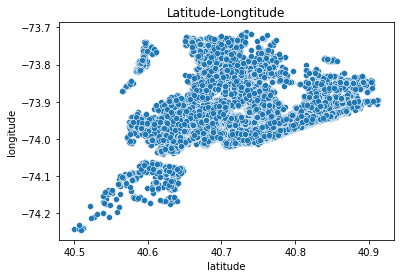

In [ ]:
import seaborn as sns
sns.scatterplot(x= df['latitude'], y=df['longitude'])
plt.title("Latitude-Longtitude")
plt.show()

Correlation between frequency of Airbnb locations and POIs

In [ ]:
from folium.plugins import HeatMap

m = folium.Map(location=[40.7389509,-74.0464677], zoom_start=12, width=1000, height=500, tiles = "Stamen Terrain")


# extract coordinates

locs = df[["latitude", "longitude"]].dropna(how="any").values
# feed it to heatmap function
HeatMap(locs).add_to(m)

for i in range(len(poi_df)):
  text = poi_df.iloc[i, 0]
  b= text.split(" ")
  longtitude = b[1]
  longtitude = longtitude[1:]
  latitude = b[2]
  latitude = latitude[:-1]
  longtitude = float(longtitude)
  latitude = float(latitude)
  tooltip = poi_df.iloc[i, 3]
  folium.Marker([latitude, longtitude], popup='<i>some content</i>', tooltip=tooltip).add_to(m)

m

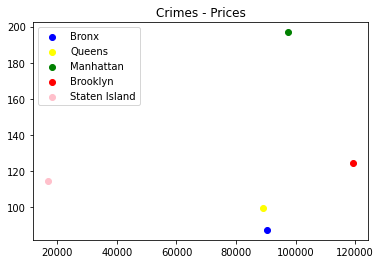

In [ ]:
plt.scatter(numdict['BRONX'], avaragepricedict['Bronx'], color='blue',label="Bronx")
plt.scatter(numdict['QUEENS'], avaragepricedict['Queens'], color='yellow',label="Queens")
plt.scatter(numdict['MANHATTAN'], avaragepricedict['Manhattan'], color='green',label="Manhattan")
plt.scatter(numdict['BROOKLYN'], avaragepricedict['Brooklyn'], color='red',label = "Brooklyn")
plt.scatter(numdict['STATEN ISLAND'], avaragepricedict['Staten Island'], color='pink',label = "Staten Island")
plt.title("Crimes - Prices")
plt.legend()
plt.show()

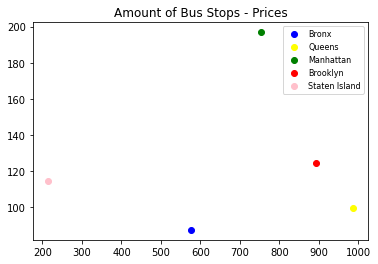

In [ ]:
plt.scatter(busdict['Bronx'], avaragepricedict['Bronx'], color='blue',label = "Bronx")
plt.scatter(busdict['Queens'], avaragepricedict['Queens'], color='yellow', label = "Queens")
plt.scatter(busdict['Manhattan'], avaragepricedict['Manhattan'], color='green', label = "Manhattan")
plt.scatter(busdict['Brooklyn'], avaragepricedict['Brooklyn'], color='red', label = "Brooklyn")
plt.scatter(busdict['Staten Island'], avaragepricedict['Staten Island'], color='pink', label ="Staten Island")
plt.title("Amount of Bus Stops - Prices")
plt.legend(prop={"size":8})
plt.show()

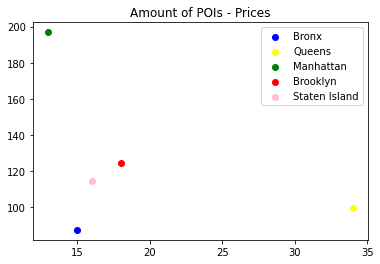

In [ ]:
plt.scatter(poidict['Bronx'], avaragepricedict['Bronx'], color='blue',label="Bronx")
plt.scatter(poidict['Queens'], avaragepricedict['Queens'], color='yellow',label="Queens")
plt.scatter(poidict['Manhattan'], avaragepricedict['Manhattan'], color='green',label="Manhattan")
plt.scatter(poidict['Brooklyn'], avaragepricedict['Brooklyn'], color='red',label="Brooklyn")
plt.scatter(poidict['Staten Island'], avaragepricedict['Staten Island'], color='pink',label="Staten Island")
plt.title("Amount of POIs - Prices")
plt.legend()
plt.show()

We have calculated the distance between an airbnb location and the closest POI. Then we scattered the plot and show the correlation.

In [ ]:
!pip install haversine

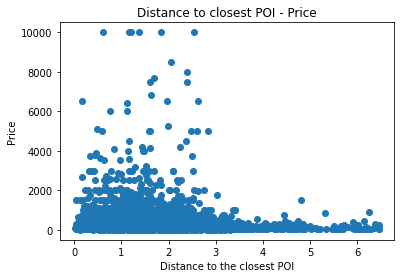

In [ ]:
import haversine as hs
import sys

distance_to_closest_poi = []
for i in range(len(df)):
  latitude = df.iloc[i,6]
  longtitude = df.iloc[i,7]
  loc1=(latitude, longtitude)
  min_distance = 1000
  for k in range(len(poi_df)):
    text = poi_df.iloc[k, 0]
    b= text.split(" ")
    longtitude = b[1]
    longtitude = longtitude[1:]
    latitude = b[2]
    latitude = latitude[:-1]
    longtitude = float(longtitude)
    latitude = float(latitude)
    loc2 = (latitude, longtitude)
    if (hs.haversine(loc1,loc2) < min_distance):
      min_distance = hs.haversine(loc1,loc2)
  distance_to_closest_poi.append(min_distance)

distance_to_closest_poi

plt.scatter(distance_to_closest_poi, df["price"])
plt.title("Distance to closest POI - Price")
plt.xlabel("Distance to the closest POI")
plt.ylabel("Price")
plt.show()

In [ ]:
#Adding the column "Distance to Nearest POI" to the main dataset for future work
df['Dist_Near_POI'] = distance_to_closest_poi 



Below you can see the price difference between the houses that contains the word Lux in it and Affordable.

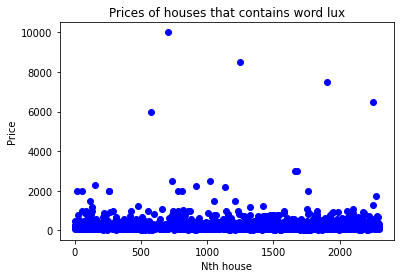

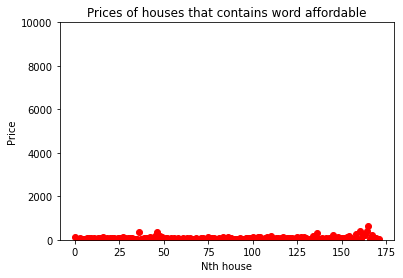

In [ ]:
containinglux=[]
containingluxprice=[]
new_col_for_lux =[]
countlux=0
containingaffordable=[]
countaffordable=0
containingaffordableprice=[]
for a in range(len(df)):
  mystr=df.iloc[a,1]
  mystr=mystr.lower()
  if mystr.count("lux")!=0:
    containinglux.append(countlux)
    countlux+=1
    new_col_for_lux.append(1)
    containingluxprice.append(df.iloc[a,9])
  else:
    new_col_for_lux.append(0)
  if mystr.count("affordable")!=0:
    containingaffordable.append(countaffordable)
    countaffordable+=1
    containingaffordableprice.append(df.iloc[a,9])


plt.scatter(containinglux, containingluxprice, color='blue')
plt.title("Prices of houses that contains word lux")
plt.xlabel("Nth house")
plt.ylabel("Price")
plt.show()
plt.scatter( containingaffordable,containingaffordableprice, color='red')
plt.title("Prices of houses that contains word affordable")
plt.xlabel("Nth house")
plt.ylim([0,10000])
plt.ylabel("Price")
plt.show()




## Hypothesis Testing

### Hypothesis 1


**Null Hypothesis ($H_0$):** Neighbourhood group does not affect the prices of Airbnb houses.

**Alternative Hypothesis ($H_A$):** Neighbourhood group affects the prices of Airbnb houses.

**Significance level**: As most of hypothesis tests assume significance level as `0.05`, we are setting it as `0.05` for our test too.

In [ ]:
significance = 0.05

In [ ]:
#Creating 5 different samples based on the neighbourhood

sample_1 = df[df["neighbourhood_group"] == "Bronx"]["price"]
sample_2 = df[df["neighbourhood_group"] == "Queens"]["price"]
sample_3 = df[df["neighbourhood_group"] == "Manhattan"]["price"]
sample_4 = df[df["neighbourhood_group"] == "Brooklyn"]["price"]
sample_5 = df[df["neighbourhood_group"] == "Staten Island"]["price"]




Before applying a test, we can visualise our samples to observe the price difference between different neighbourhoods.

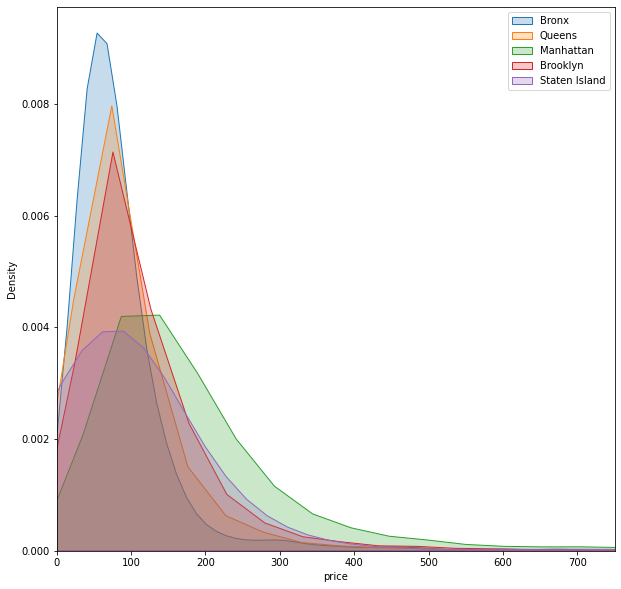

In [ ]:


fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.set_xlim(0,750)

sns.kdeplot(sample_1, shade=True, ax=ax, label="Bronx")
sns.kdeplot(sample_2, shade=True, ax=ax, label="Queens")
sns.kdeplot(sample_3, shade=True, ax=ax, label="Manhattan")
sns.kdeplot(sample_4, shade=True, ax=ax, label="Brooklyn")
sns.kdeplot(sample_5, shade=True, ax=ax, label="Staten Island")

plt.legend()
plt.show()

To see our data more clearly, we plot it by using a histogram.

Text(0.5, 1.0, 'Staten Island')

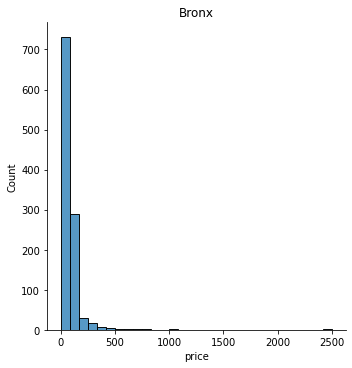

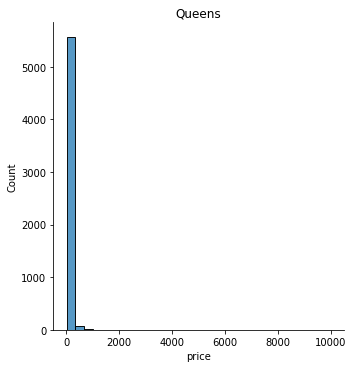

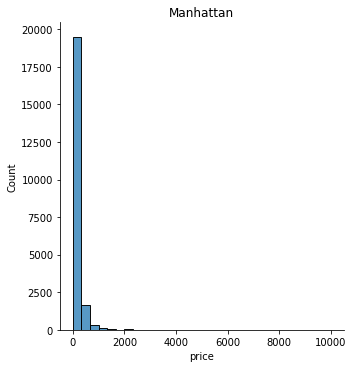

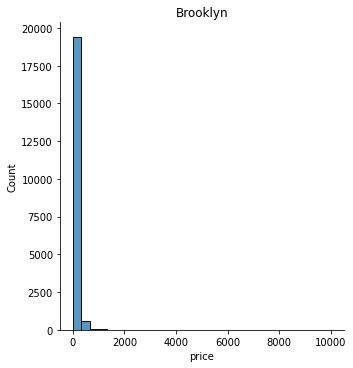

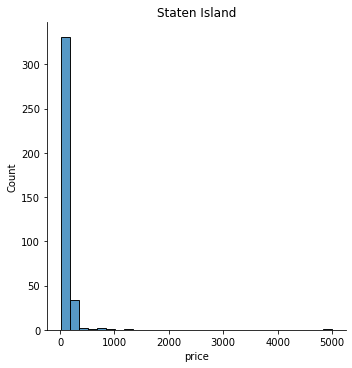

In [ ]:
price_plt = sns.displot(sample_1,bins = 30)
plt.title("Bronx")
price_plt = sns.displot(sample_2,bins = 30)
plt.title("Queens")
price_plt = sns.displot(sample_3,bins = 30)
plt.title("Manhattan")
price_plt = sns.displot(sample_4,bins = 30)
plt.title("Brooklyn")
price_plt = sns.displot(sample_5,bins = 30)
plt.title("Staten Island")

Since the data is heavily skewed, we need to transform our data by using log transformation to understand it better. 

Text(0.5, 1.0, 'Staten Island')

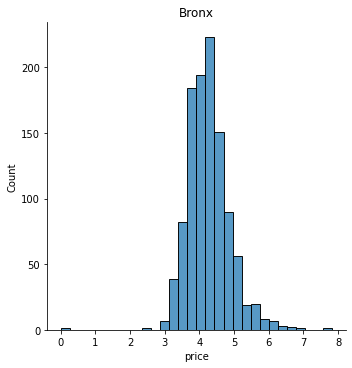

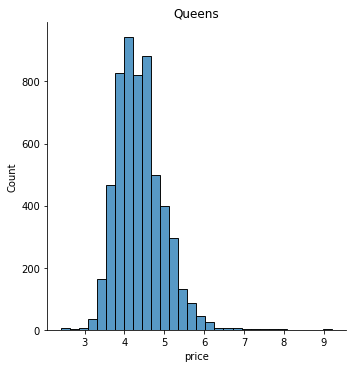

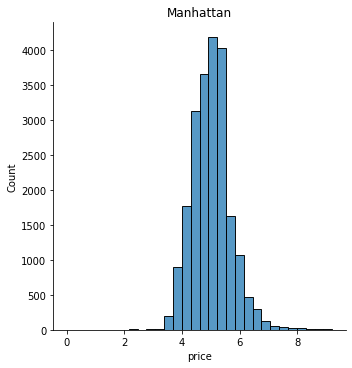

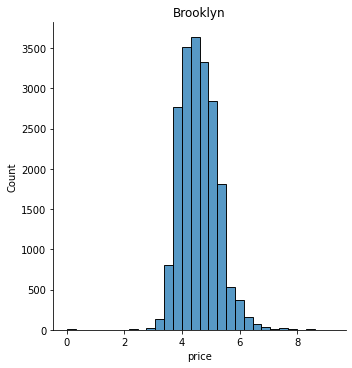

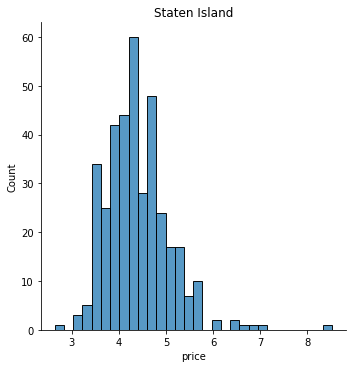

In [ ]:
log_price_plt = sns.displot(np.log1p(sample_1),bins = 30)
plt.title("Bronx")
log_price_plt = sns.displot(np.log1p(sample_2),bins = 30)
plt.title("Queens")
log_price_plt = sns.displot(np.log1p(sample_3),bins = 30)
plt.title("Manhattan")
log_price_plt = sns.displot(np.log1p(sample_4),bins = 30)
plt.title("Brooklyn")
log_price_plt = sns.displot(np.log1p(sample_5),bins = 30)
plt.title("Staten Island")

Looking at these histograms, it is seen that there is a price difference between neighbourhoods. But we also need to prove it by using a test. For this task, we are going to use ANOVA. 

In [ ]:
from scipy.stats import f_oneway
import random

In [ ]:
# We randomly select 200 points to increase computational efficiency


sample_1_test = sample_1.sample(n=200, random_state=1)
sample_2_test = sample_2.sample(n=200, random_state=1)
sample_3_test = sample_3.sample(n=200, random_state=1)
sample_4_test = sample_4.sample(n=200, random_state=1)
sample_5_test = sample_5.sample(n=200, random_state=1)


f_stats, p_values = f_oneway(sample_1_test.values, sample_2_test.values, sample_3_test.values,sample_4_test.values,sample_5_test.values)

if (significance > p_values):
  print("P value: ",format(p_values,".2E"))
  print("Signifance Level:", significance)
  print("Since p value is lower than the significance level, we reject Null Hypothesis")
else:
  print("P value: ",format(p_values,".2E"))
  print("Signifance Level:", significance)
  print("Since p value is larger than the significance level, we fail to reject Null Hypothesis")


P value:  7.04E-05
Signifance Level: 0.05
Since p value is lower than the significance level, we reject Null Hypothesis


### Hypothesis 2

**Null Hypothesis ($H_0$):** Number of reviews does not affect the prices of Airbnb houses.

**Alternative Hypothesis ($H_A$):** Number of reviews affect the prices of Airbnb houses.

**Significance level**: As most of hypothesis tests assume significance level as `0.05`, we are setting it as `0.05` for our test too.

In [ ]:
#Creating two different samples based on the number of reviews a house has.
#If a house has less than or equal to 200 reviews, it belongs to low review group. Else, it belongs to the high review group.

low_df = df[df["number_of_reviews"] <= 200]["price"]
high_df = df[df["number_of_reviews"] > 200]["price"]





Before applying a test, we visualise our samples by using a histogram to observe the price difference between the two samples.

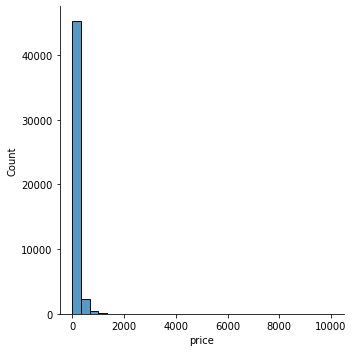

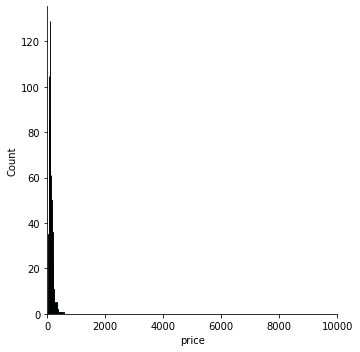

In [ ]:
price_plt = sns.displot(low_df,bins = 30)
plt.show()



price_plt = sns.displot(high_df,bins = 30)
plt.xlim([0,10000])
plt.show()

Since the data is heavily skewed, we need to transform our data by using log transformation to understand it better.

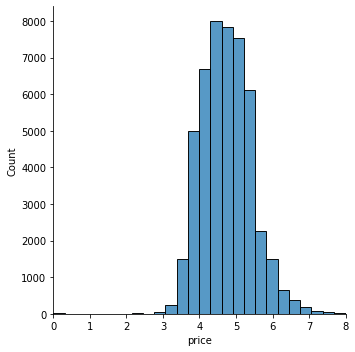

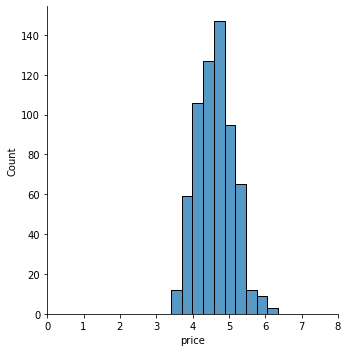

In [ ]:
log_price_plt = sns.displot(np.log1p(low_df),bins = 30)
plt.xlim([0,8])
plt.show()



log_price_plt = sns.displot(np.log1p(high_df),bins = 10)
plt.xlim([0,8])
plt.show()

Looking at these histograms, it is seen that there is a price difference between two samples. But we also need to prove it by using a test. For this task, we are going to use Two-Sample T-test.

In [ ]:
from scipy import stats


In [ ]:

if low_df.std()**2 != high_df.std()**2:
  print("Variances are not equal")
  statistic, p_values = stats.ttest_ind(low_df, high_df, equal_var=False)  # since we have not equal variances
else:
  print("Variances are equal")
  statistic, p_values = stats.ttest_ind(low_df, high_df, equal_var=True)  # since we have equal variances

if (significance > p_values):
  print("P value: ",format(p_values,".2E"))
  print("Signifance Level:", significance)
  print("Since p value is lower than the significance level, we reject Null Hypothesis")
else:
  print("P value: ",format(p_values,".2E"))
  print("Signifance Level:", significance)
  print("Since p value is larger than the significance level, we fail to reject Null Hypothesis")

Variances are not equal
P value:  1.95E-41
Signifance Level: 0.05
Since p value is lower than the significance level, we reject Null Hypothesis


### Hypothesis 3


**Null Hypothesis ($H_0$):** Number of reviews does not affect the prices of Airbnb houses.

**Alternative Hypothesis ($H_A$):** Number of reviews affect the prices of Airbnb houses.

**Significance level**: As most of hypothesis tests assume significance level as `0.05`, we are setting it as `0.05` for our test too.

Before applying a test, we visualise our maindata by using a scatterplot to observe if availiability affects price.


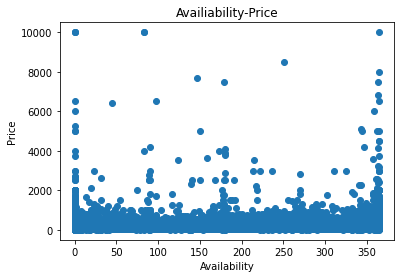

In [ ]:
plt.scatter(df["availability_365"], df["price"])
plt.title("Availiability-Price")
plt.xlabel("Availability")
plt.ylabel("Price")

plt.show()

We split our main data to two depending on its availability and use log transformation because of it's skewness and visualize them with histograms.

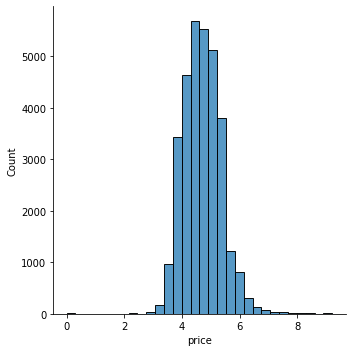

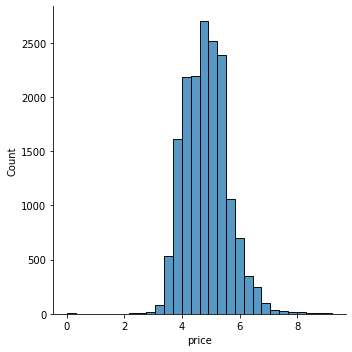

In [ ]:
low_availability = df[df["availability_365"] <= 150]["price"]
high_availability = df[df["availability_365"] > 150]["price"]


log_price_plt = sns.displot(np.log1p(low_availability),bins = 30)

plt.show()


log_price_plt = sns.displot(np.log1p(high_availability),bins = 30)

plt.show()

In [ ]:
if low_availability.std()**2 != high_availability.std()**2:
  print("Variances are not equal")
  statistic, p_values = stats.ttest_ind(low_availability, high_availability, equal_var=False)  # since we have not equal variances
else:
  print("Variances are equal")
  statistic, p_values = stats.ttest_ind(low_availability, high_availability, equal_var=True)  # since we have equal variances

if (significance > p_values):
  print("P value: ",format(p_values,".2E"))
  print("Signifance Level:", significance)
  print("Since p value is lower than the significance level, we reject Null Hypothesis")
else:
  print("P value: ",format(p_values,".2E"))
  print("Signifance Level:", significance)
  print("Since p value is larger than the significance level, we fail to reject Null Hypothesis")


Variances are not equal
P value:  6.13E-50
Signifance Level: 0.05
Since p value is lower than the significance level, we reject Null Hypothesis


###Hypothesis 4

**Null Hypothesis ($H_0$):** Longitude does not affect the prices of Airbnb houses.

**Alternative Hypothesis ($H_A$):** Longitude affect the prices of Airbnb houses.

**Significance level**: As most of hypothesis tests assume significance level as `0.05`, we are setting it as `0.05` for our test too.

In [ ]:
print(df["longitude"].mean())

west = df[df["longitude"] <= -73.95217028736278]["price"]
east = df[df["longitude"] > -73.95217028736278]["price"]


-73.95217028736278


Before applying a test, we visualise longitude and prices by using a scatterplot to observe if longitude affects price.


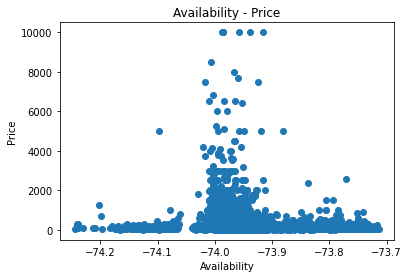

In [ ]:
plt.scatter(df["longitude"], df["price"])
plt.title('Availability - Price')
plt.xlabel("Availability")
plt.ylabel("Price")

plt.show()

In [ ]:
east_test = east.sample(n=20000, random_state=1)
west_test = west.sample(n=20000, random_state=1)

In [ ]:
if east_test.std()**2 != west_test.std()**2:
  print("Variances are not equal")
  statistic, p_value = stats.ttest_ind(east_test, west_test, equal_var=False)  # since we have not equal variances
else:
  print("Variances are equal")
  stats.ttest_ind(east_test, west_test, equal_var=True)  # since we have equal variances
if (significance > p_value):
  print("P value: ",format(p_value,".2E"))
  print("Signifance Level:", significance)
  print("Since p value is lower than the significance level, we reject Null Hypothesis")
else:
  print("P value: ",format(p_value,".2E"))
  print("Signifance Level:", significance)
  print("Since p value is larger than the significance level, we fail to reject Null Hypothesis")


Variances are not equal
P value:  7.93E-276
Signifance Level: 0.05
Since p value is lower than the significance level, we reject Null Hypothesis


Since there is no big difference between giving a hypothesis for longitude and latitude we do not count this part as another hypothesis.

Before applying a test, we visualise latitude and prices by using a scatterplot to observe if latitude affects price.


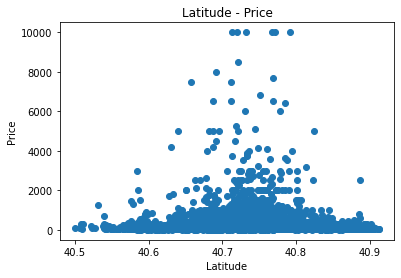

In [ ]:
plt.scatter(df["latitude"], df["price"])
plt.title('Latitude - Price')
plt.xlabel("Latitude")
plt.ylabel("Price")

plt.show()

In [ ]:
#to split two groups according to latitude
print(df["latitude"].mean())



40.728941174628574


In [ ]:
downtown = df[df["latitude"] <= 40.728941174628574]["price"]
uptown = df[df["latitude"] > 40.728941174628574]["price"]

downtown_test = downtown.sample(n=20000, random_state=1)
uptown_test = uptown.sample(n=20000, random_state=1)

if downtown_test.std()**2 != uptown_test.std()**2:
  print("Variances are not equal")
  statistic, p_value = stats.ttest_ind(downtown_test, uptown_test, equal_var=False)  # since we have not equal variances
else:
  print("Variances are equal")
  stats.ttest_ind(downtown_test, uptown_test, equal_var=True)  # since we have equal variances
if (significance > p_value):
  print("P value: ",format(p_value,".2E"))
  print("Signifance Level:", significance)
  print("Since p value is lower than the significance level, we reject Null Hypothesis")
else:
  print("P value: ",format(p_value,".2E"))
  print("Signifance Level:", significance)
  print("Since p value is larger than the significance level, we fail to reject Null Hypothesis")

Variances are not equal
P value:  4.97E-43
Signifance Level: 0.05
Since p value is lower than the significance level, we reject Null Hypothesis


###Hypothesis 5

**Null Hypothesis ($H_0$):** Distance between the neares POI does not affect the prices of Airbnb houses.

**Alternative Hypothesis ($H_A$):** Distance between the neares POI affect the prices of Airbnb houses. 

**Significance level**: As most of hypothesis tests assume significance level as `0.05`, we are setting it as `0.05` for our test too.

In [ ]:
#to find where to split our data
df['Dist_Near_POI'].median()

1.4007168631386253

In [ ]:
close_df = df[df["Dist_Near_POI"] <= 1.4007168631386253]["price"]
distant_df = df[df["Dist_Near_POI"] > 1.4007168631386253]["price"]

Before applying a test, we visualise distances to POIs as histograms to see if they have an affect on prices.

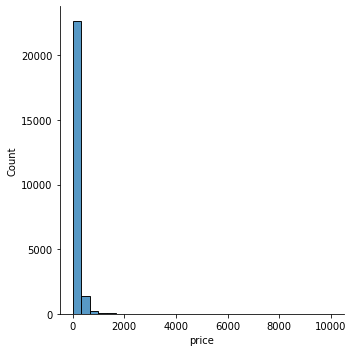

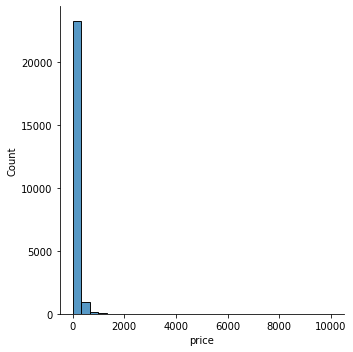

In [ ]:
pltt = sns.displot(close_df,bins = 30)
plt.show()
pltt = sns.displot(distant_df,bins = 30)

plt.show()

Since the visualized histograms are skewed we use log transformation to visualize difference better.

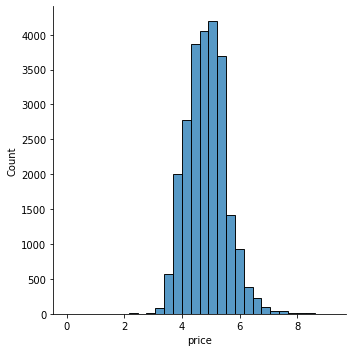

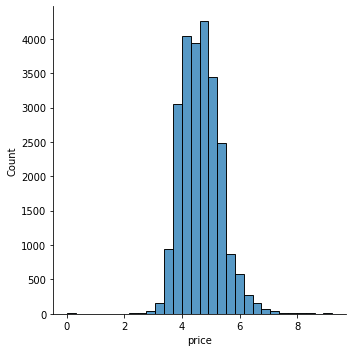

In [ ]:
log_price_plt = sns.displot(np.log1p(close_df),bins = 30)

plt.show()


log_price_plt = sns.displot(np.log1p(distant_df),bins = 30)

plt.show()

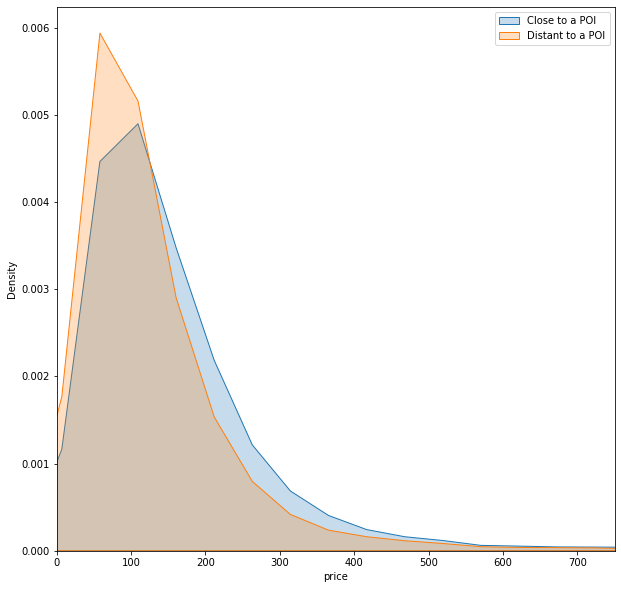

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.set_xlim(0,750)


sns.kdeplot(close_df, shade=True, ax=ax, label="Close to a POI")
sns.kdeplot(distant_df, shade=True, ax=ax, label="Distant to a POI")

plt.legend()
plt.show()

In [ ]:
if close_df.std()**2 != distant_df.std()**2:
  print("Variances are not equal")
  statistics, p_values = stats.ttest_ind(close_df, distant_df, equal_var=False)  # since we have not equal variances
else:
  print("Variances are equal")
  statistics, p_values = stats.ttest_ind(close_df, distant_df, equal_var=True)  # since we have equal variances
if (significance > p_values):
  print("P value: ",format(p_values,".2E"))
  print("Signifance Level:", significance)
  print("Since p value is lower than the significance level, we reject Null Hypothesis")
else:
  print("P value: ",format(p_values,".2E"))
  print("Signifance Level:", significance)
  print("Since p value is larger than the significance level, we fail to reject Null Hypothesis")

Variances are not equal
P value:  2.00E-37
Signifance Level: 0.05
Since p value is lower than the significance level, we reject Null Hypothesis


### Hypothesis 6


**Null Hypothesis ($H_0$):** Distance to the nearest bus does not affect the prices of Airbnb houses.

**Alternative Hypothesis ($H_A$):** Distance to the nearest bus affect the prices of Airbnb houses.

**Significance level**: As most of hypothesis tests assume significance level as `0.05`, we are setting it as `0.05` for our test too.

Before applying a test, we visualise distances to buses as histograms to see if they have an affect on prices.

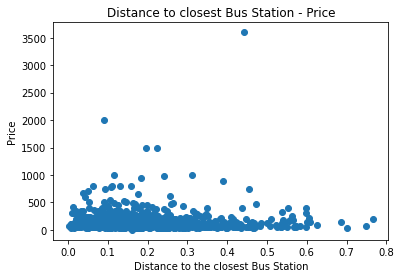

In [ ]:
import haversine as hs
import sys

bus_sample = df.sample(n=1000, random_state=1)

distance_to_closest_bus_station = []
for i in range(len(bus_sample)):
  latitude = bus_sample.iloc[i,6]
  longtitude = bus_sample.iloc[i,7]
  loc1=(latitude, longtitude)
  min_distance = 1000
  for k in range(len(bus_df)):
    longtitude = bus_df.iloc[k, 2]
    latitude = bus_df.iloc[k, 3]
    loc2 = (latitude, longtitude)
    if (hs.haversine(loc1,loc2) < min_distance):
      min_distance = hs.haversine(loc1,loc2)
  distance_to_closest_bus_station.append(min_distance)

distance_to_closest_bus_station

plt.scatter(distance_to_closest_bus_station, bus_sample["price"])
plt.title("Distance to closest Bus Station - Price")
plt.xlabel("Distance to the closest Bus Station")
plt.ylabel("Price")
plt.show()

In [ ]:
bus_sample['Dist_to_near_bus'] = distance_to_closest_bus_station

In [ ]:
#To understand where to split the data
print(bus_sample["Dist_to_near_bus"].median())
print(bus_sample["Dist_to_near_bus"].describe())

0.16784861738398332
count    1000.000000
mean        0.192563
std         0.126323
min         0.001898
25%         0.102795
50%         0.167849
75%         0.252978
max         0.766489
Name: Dist_to_near_bus, dtype: float64


In [ ]:
close_bus_df = bus_sample[bus_sample["Dist_to_near_bus"] <= 0.16784861738398332]["price"]
distant_bus_df = bus_sample[bus_sample["Dist_to_near_bus"] > 0.16784861738398332]["price"]

Since the visualized histograms are skewed we use log transformation to visualize difference better.

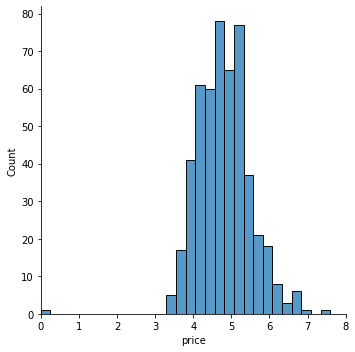

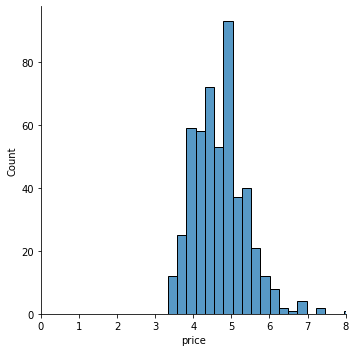

In [ ]:
log_price_plt = sns.displot(np.log1p(close_bus_df),bins = 30)
plt.xlim([0,8])
plt.show()


log_price_plt = sns.displot(np.log1p(distant_bus_df),bins = 20)
plt.xlim([0,8])
plt.show()

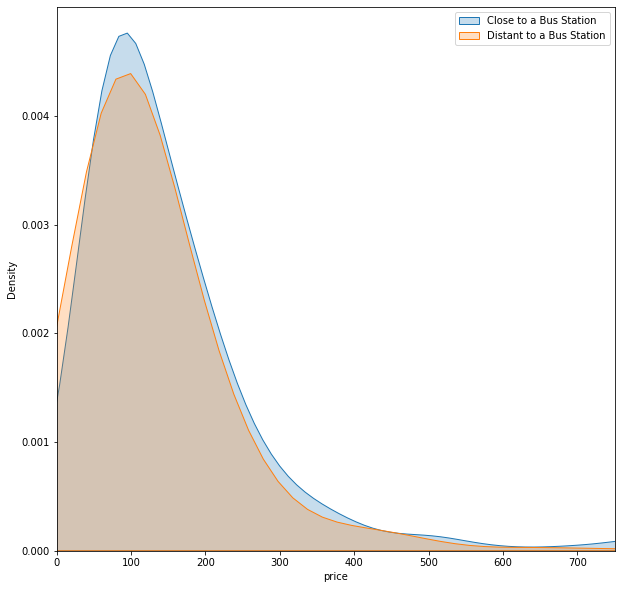

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.set_xlim(0,750)


sns.kdeplot(close_bus_df, shade=True, ax=ax, label="Close to a Bus Station")
sns.kdeplot(distant_bus_df, shade=True, ax=ax, label="Distant to a Bus Station")

plt.legend()
plt.show()

In [ ]:
if close_bus_df.std()**2 != distant_bus_df.std()**2:
  print("Variances are not equal")
  statistics, p_values = stats.ttest_ind(close_bus_df, distant_bus_df, equal_var=False)  # since we have not equal variances
else:
  print("Variances are equal")
  statistics, p_values = stats.ttest_ind(close_bus_df, distant_bus_df, equal_var=True)  # since we have equal variances
if (significance > p_values):
  print("P value: ",format(p_values,".2E"))
  print("Signifance Level:", significance)
  print("Since p value is lower than the significance level, we reject Null Hypothesis")
else:
  print("P value: ",format(p_values,".2E"))
  print("Signifance Level:", significance)
  print("Since p value is larger than the significance level, we fail to reject Null Hypothesis")

Variances are not equal
P value:  3.50E-01
Signifance Level: 0.05
Since p value is larger than the significance level, we fail to reject Null Hypothesis


###Hypothesis 7


**Null Hypothesis ($H_0$):** Distance to the nearest subway does not affect the prices of Airbnb houses.

**Alternative Hypothesis ($H_A$):** Distance to the nearest subway affect the prices of Airbnb houses.

**Significance level**: As most of hypothesis tests assume significance level as `0.05`, we are setting it as `0.05` for our test too.

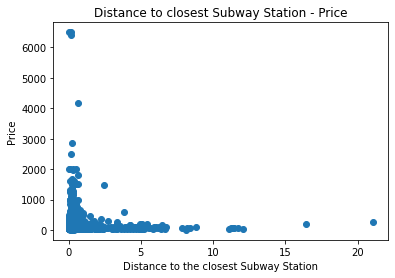

In [ ]:
import haversine as hs
import sys

subway_sample = df.sample(n=5000, random_state = 23)

distance_to_closest_subway_station = []
for i in range(len(subway_sample)):
  latitude = subway_sample.iloc[i,6]
  longtitude = subway_sample.iloc[i,7]
  loc1=(latitude, longtitude)
  min_distance = 1000
  for k in range(len(subway_df)):
    text = subway_df.iloc[k, 1]
    b= text.split(" ")
    longtitude = b[1]
    longtitude = longtitude[1:]
    latitude = b[2]
    latitude = latitude[:-1]
    longtitude = float(longtitude)
    latitude = float(latitude)
    loc2 = (latitude, longtitude)
    if (hs.haversine(loc1,loc2) < min_distance):
      min_distance = hs.haversine(loc1,loc2)
  distance_to_closest_subway_station.append(min_distance)

distance_to_closest_subway_station

plt.scatter(distance_to_closest_subway_station, subway_sample["price"])
plt.title("Distance to closest Subway Station - Price")
plt.xlabel("Distance to the closest Subway Station")
plt.ylabel("Price")
plt.show()

In [ ]:
subway_sample['Dist_to_near_subway'] = distance_to_closest_subway_station


In [ ]:
#To find where to split the data
print(subway_sample["Dist_to_near_subway"].median())
print(subway_sample["Dist_to_near_subway"].describe())



0.3131507310989195
count    5000.000000
mean        0.478421
std         0.866879
min         0.002372
25%         0.205333
50%         0.313151
75%         0.471456
max        21.054334
Name: Dist_to_near_subway, dtype: float64


In [ ]:
close_subway_df = subway_sample[subway_sample["Dist_to_near_subway"] <= 0.3131507310989195]["price"]
distant_subway_df = subway_sample[subway_sample["Dist_to_near_subway"] > 0.3131507310989195]["price"]

Before applying a test, we visualise distances to subways as histograms to see if they have an affect on prices.

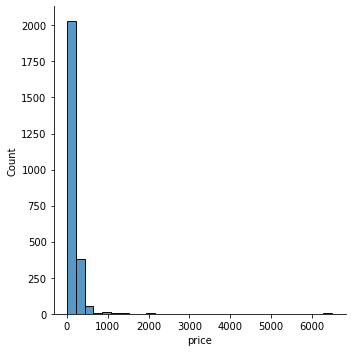

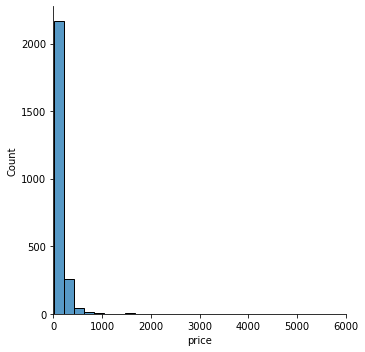

In [ ]:
price_plt = sns.displot(close_subway_df, bins=30)
plt.show()

price_plt = sns.displot(distant_subway_df, bins = 20)
plt.xlim([0,6000])
plt.show()

Since the visualized histograms are skewed we use log transformation to visualize difference better.

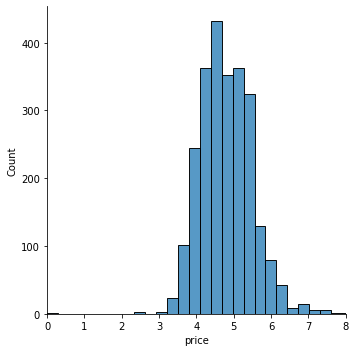

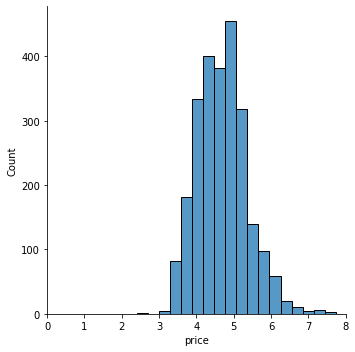

In [ ]:
log_price_plt = sns.displot(np.log1p(close_subway_df),bins = 30)
plt.xlim([0,8])
plt.show()


log_price_plt = sns.displot(np.log1p(distant_subway_df),bins = 20)
plt.xlim([0,8])
plt.show()

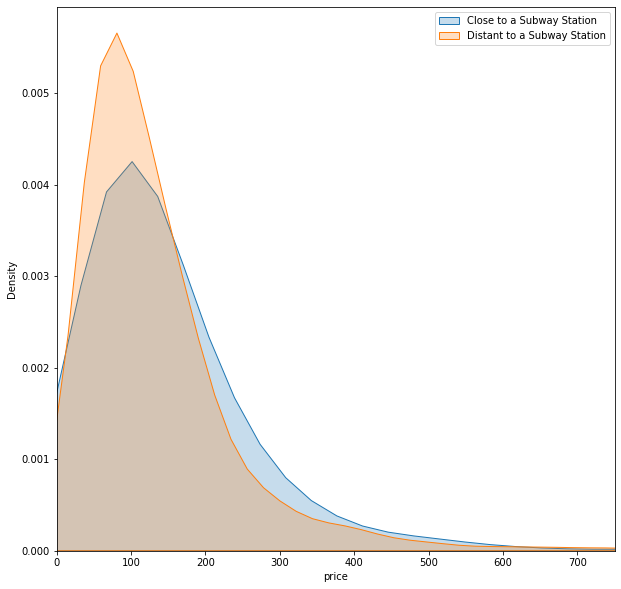

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.set_xlim(0,750)


sns.kdeplot(close_subway_df, shade=True, ax=ax, label="Close to a Subway Station")
sns.kdeplot(distant_subway_df, shade=True, ax=ax, label="Distant to a Subway Station")

plt.legend()
plt.show()

In [ ]:
if close_subway_df.std()**2 != distant_subway_df.std()**2:
  print("Variances are not equal")
  statistics, p_values = stats.ttest_ind(close_subway_df, distant_subway_df, equal_var=False)  # since we have not equal variances
else:
  print("Variances are equal")
  statistics, p_values = stats.ttest_ind(close_subway_df, distant_subway_df, equal_var=True)  # since we have equal variances
if (significance > p_values):
  print("P value: ",format(p_values,".2E"))
  print("Signifance Level:", significance)
  print("Since p value is lower than the significance level, we reject Null Hypothesis")
else:
  print("P value: ",format(p_values,".2E"))
  print("Signifance Level:", significance)
  print("Since p value is larger than the significance level, we fail to reject Null Hypothesis")

Variances are not equal
P value:  4.58E-04
Signifance Level: 0.05
Since p value is lower than the significance level, we reject Null Hypothesis


###Hypothesis 8

**Null Hypothesis ($H_0$):** Difference between the houses that has word 'Lux' and 'Affordable' in it does not affect the prices of Airbnb houses.

**Alternative Hypothesis ($H_A$):** Difference between the houses that has word 'Lux' and 'Affordable' in it affect the prices of Airbnb houses.

**Significance level**: As most of hypothesis tests assume significance level as `0.05`, we are setting it as `0.05` for our test too.

In [ ]:
lux_sample = {'Price':containingluxprice}
lux_df = pd.DataFrame(lux_sample,columns=['Price'])

afford_sample = {'Price':containingaffordableprice}
afford_df = pd.DataFrame(afford_sample, columns=['Price'])


In [ ]:
lux_df.describe()

Price
count   2300.000000
mean     265.153043
std      429.540227
min       27.000000
25%      125.000000
50%      195.000000
75%      285.000000
max    10000.000000

Before applying a test, we visualise distances to buses as histograms to see if they have an affect on prices.

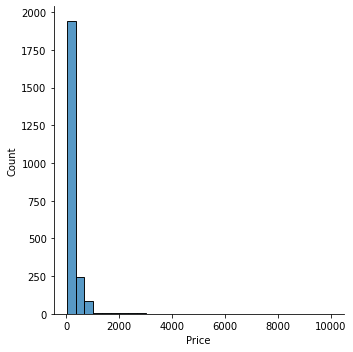

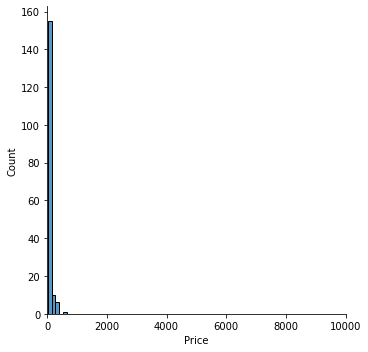

In [ ]:
price_plt = sns.displot(lux_df["Price"], bins=30)
plt.show()

price_plt = sns.displot(afford_df["Price"], bins = 5)
plt.xlim([0,10000])
plt.show()

Since the visualized histograms are skewed we use log transformation to visualize difference better.

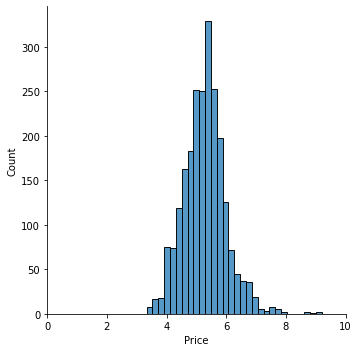

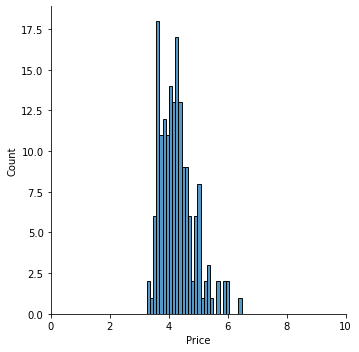

In [ ]:
price_plt = sns.displot(np.log1p(lux_df["Price"]), bins=30)
plt.xlim([0,10])
plt.show()



price_plt = sns.displot(np.log1p(afford_df["Price"]), bins = 30)
plt.xlim([0,10])
plt.show()

In [ ]:
lux_df.head()

Price
0     52
1    100
2    475
3    250
4    196

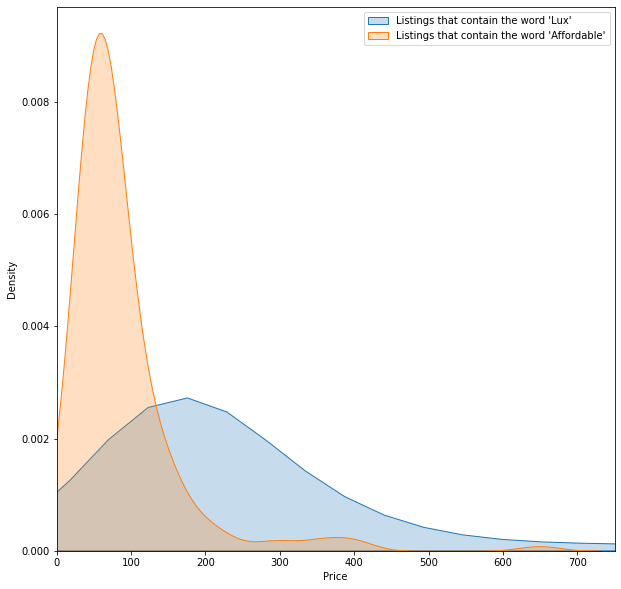

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.set_xlim(0,750)


sns.kdeplot(lux_df["Price"], shade=True, ax=ax, label="Listings that contain the word 'Lux'")
sns.kdeplot(afford_df["Price"], shade=True, ax=ax, label="Listings that contain the word 'Affordable'")

plt.legend()
plt.show()

In [ ]:
if lux_df["Price"].std()**2 != afford_df["Price"].std()**2:
  print("Variances are not equal")
  statistics, p_values = stats.ttest_ind(lux_df["Price"], afford_df["Price"], equal_var=False)  # since we have not equal variances
else:
  print("Variances are equal")
  statistics, p_values = stats.ttest_ind(lux_df["Price"], afford_df["Price"], equal_var=True)  # since we have equal variances
if (significance > p_values):
  print("P value: ",format(p_values,".2E"))
  print("Signifance Level:", significance)
  print("Since p value is lower than the significance level, we reject Null Hypothesis")
else:
  print("P value: ",format(p_values,".2E"))
  print("Signifance Level:", significance)
  print("Since p value is larger than the significance level, we fail to reject Null Hypothesis")


Variances are not equal
P value:  6.55E-56
Signifance Level: 0.05
Since p value is lower than the significance level, we reject Null Hypothesis


###Hypothesis 9

**Null Hypothesis ($H_0$):** Difference between the houses that crime reports in 1 km does not affect the prices of Airbnb houses.

**Alternative Hypothesis ($H_A$):** Difference between the houses that crime reports in 1 km affect the prices of Airbnb houses.

**Significance level**: As most of hypothesis tests assume significance level as `0.05`, we are setting it as `0.05` for our test too.

In [ ]:
import haversine as hs
import sys
complaint_sample = df.sample(n=1000, random_state = 1)
realcomplaint_sample = complaint_df.sample(n=5000, random_state=1)
counts_of_houses=[]
for i in range(len(complaint_sample)):
  counts_of_houses.append(0)
  latitude = complaint_sample.iloc[i,6]
  longtitude = complaint_sample.iloc[i,7]
  loc1=(latitude, longtitude)
  min_distance = 1
  for k in range(len(realcomplaint_sample)):
    text = realcomplaint_sample.iloc[k, 5]
    b= text.split(" ")
    longtitude = b[1]
    longtitude = longtitude[:-1]
    latitude = b[0]
    latitude = latitude[1:-1]
    longtitude = float(longtitude)
    latitude = float(latitude)
    loc2 = (latitude, longtitude)
    if (hs.haversine(loc1,loc2) <= min_distance):
      counts_of_houses[i]+=1





In [ ]:
complaint_sample['Complaint_amount'] = counts_of_houses

In [ ]:
complaint_sample['Complaint_amount'].median()

50.0

In [ ]:
lesscomplaint_df = complaint_sample[complaint_sample["Complaint_amount"] <= 50]["price"]
morecomplaint_df = complaint_sample[complaint_sample["Complaint_amount"] > 50]["price"]

Before applying a test, we visualise distances to buses as histograms to see if they have an affect on prices.

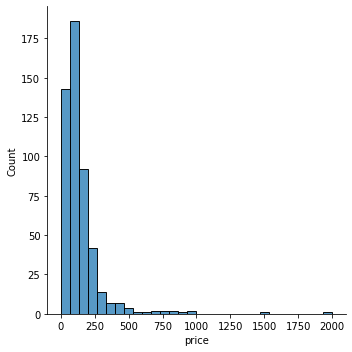

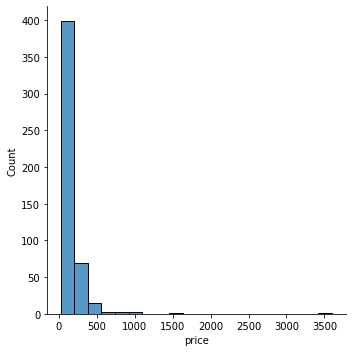

In [ ]:
pltt = sns.displot(lesscomplaint_df,bins = 30)
plt.show()


pltt = sns.displot(morecomplaint_df,bins = 20)
plt.show()

Since the visualized histograms are skewed we use log transformation to visualize difference better.

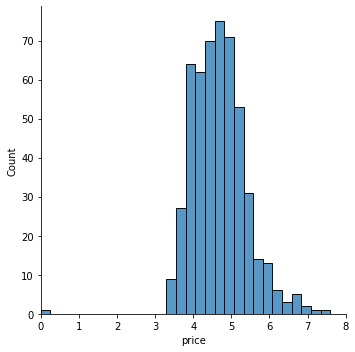

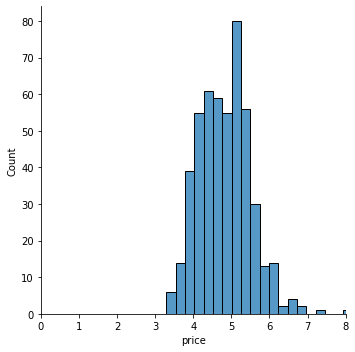

In [ ]:
log_price_plt = sns.displot(np.log1p(lesscomplaint_df),bins = 30)
plt.xlim([0,8])
plt.show()


log_price_plt = sns.displot(np.log1p(morecomplaint_df),bins = 20)
plt.xlim([0,8])
plt.show()

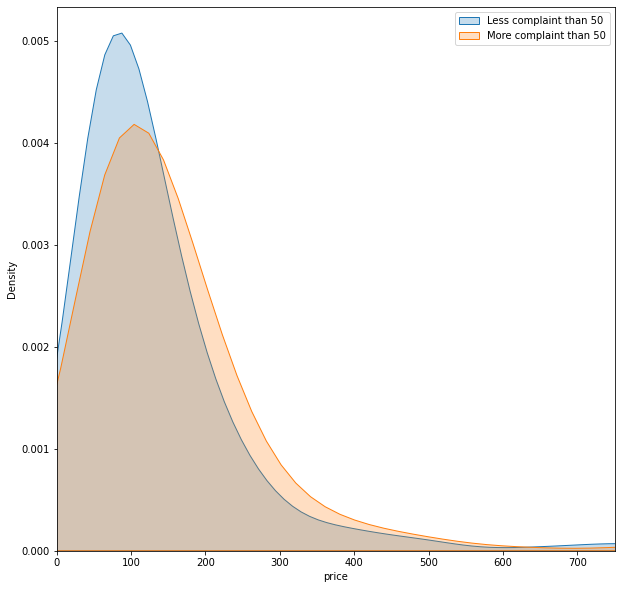

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.set_xlim(0,750)


sns.kdeplot(lesscomplaint_df, shade=True, ax=ax, label="Less complaint than 50")
sns.kdeplot(morecomplaint_df, shade=True, ax=ax, label="More complaint than 50")

plt.legend()
plt.show()

In [ ]:
if lesscomplaint_df.std()**2 != morecomplaint_df.std()**2:
  print("Variances are not equal")
  statistics, p_values = stats.ttest_ind(lesscomplaint_df, morecomplaint_df, equal_var=False)  # since we have not equal variances
else:
  print("Variances are equal")
  statistics, p_values = stats.ttest_ind(lesscomplaint_df, morecomplaint_df, equal_var=True)  # since we have equal variances
if (significance > p_values):
  print("P value: ",format(p_values,".2E"))
  print("Signifance Level:", significance)
  print("Since p value is lower than the significance level, we reject Null Hypothesis")
else:
  print("P value: ",format(p_values,".2E"))
  print("Signifance Level:", significance)
  print("Since p value is larger than the significance level, we fail to reject Null Hypothesis")

Variances are not equal
P value:  1.12E-01
Signifance Level: 0.05
Since p value is larger than the significance level, we fail to reject Null Hypothesis


## Machine Learning

### Data Preparation

In [ ]:
df.head()
df_lr = df
df_lr.head()

id  ... Dist_Near_POI
0  2539  ...      1.555002
1  2595  ...      0.516936
2  3647  ...      0.621773
3  3831  ...      1.773661
4  5022  ...      0.561297

[5 rows x 16 columns]

We transform string units to integer classifications.

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in df_lr.columns:
  if col == 'neighbourhood' or col == 'neighbourhood_group' or col == 'room_type':
    le.fit(df_lr[col])
    df_lr[col] = le.transform(df_lr[col])

We drop the columns that are unnecessary in machine learning models we will use. 

In [ ]:
df_lr = df_lr.drop('name', axis=1)
df_lr = df_lr.drop('id', axis=1)
df_lr = df_lr.drop('host_name', axis=1)
df_lr = df_lr.drop('price', axis=1)
df_lr = df_lr.drop('host_id', axis=1)

In [ ]:
df.head()

id  ... Dist_Near_POI
0  2539  ...      1.555002
1  2595  ...      0.516936
2  3647  ...      0.621773
3  3831  ...      1.773661
4  5022  ...      0.561297

[5 rows x 16 columns]

In [ ]:

df_lr.head()

neighbourhood_group  neighbourhood  ...  availability_365  Dist_Near_POI
0                    1            108  ...               365       1.555002
1                    2            127  ...               355       0.516936
2                    2             94  ...               365       0.621773
3                    1             41  ...               194       1.773661
4                    2             61  ...                 0       0.561297

[5 rows x 11 columns]

### Multiple Linear Regression

We copy df_lr to X data frame to use it in Multiple Linear Regression models. X consists of different features such as availability and minimum nights.

In [ ]:
X= df_lr
y = df['price']


We split our data into three parts: Train, Validation and Test.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from os.path import join
from sklearn import linear_model

We created a linear regression model and trained it with our train data.

In [ ]:
model = LinearRegression()  
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Then by using this model, we predicted the prices of the test data.

In [ ]:
y_pred = model.predict(X_test)
y_pred


array([ 88.07400918,  19.59003272, 100.68445163, ...,  55.47222   ,
        94.99449075, 266.41718688])

Below you can see the results.

In [ ]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})
df1.tail()

Actual   Predicted
42072     100  174.379319
6477      112  182.016213
28814      35   55.472220
5892       75   94.994491
33466     170  266.417187

By using different metrics, we measure the success of our model. Later, we will compare it with the results of different models.

In [ ]:
from sklearn import metrics

print('Mean Absolute Error of Multiple Linear Regression:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error of Multiple Linear Regression:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error of Multiple Linear Regression:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-square score of Multiple Linear Regression: ', metrics.r2_score(y_test, y_pred))

Mean Absolute Error of Multiple Linear Regression: 78.06524665186926
Mean Squared Error of Multiple Linear Regression: 76011.53735363073
Root Mean Squared Error of Multiple Linear Regression: 275.7018994378362
R-square score of Multiple Linear Regression:  0.06893904373023829


After the result of our multiple linear regression model, we use regularization methods such as Lasso to increase the performance of our models.

training score: 0.08462000862047338
test score:  0.05946141513033065
number of features used:  10
training score for alpha=10: 0.07417777930029212
test score for alpha =10:  0.05187767194083159
number of features used: for alpha =10: 6
training score for alpha=0.01: 0.09492127491565173
test score for alpha =0.01:  0.06891165660060339
number of features used: for alpha =0.01: 11
training score for alpha=0.0001: 0.09492317302779685
test score for alpha =0.0001:  0.0689387831158611
number of features used: for alpha =0.0001: 11
LR training score: 0.09492317321762866
LR test score:  0.06893904373023829


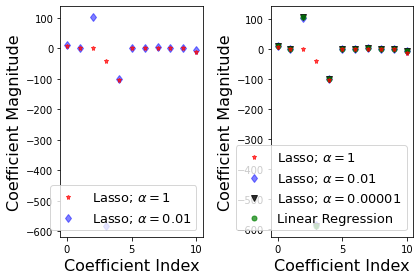

In [ ]:
import math 
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
# difference of lasso and ridge regression is that some of the coefficients can be zero i.e. some of the features are 
# completely neglected
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

#print cancer.keys()

#print cancer_df.head(3)
lasso = Lasso()
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)
print ("training score:", train_score)
print ("test score: ", test_score)
print ("number of features used: ", coeff_used)
lasso10= Lasso(alpha=10, max_iter=10e5)
lasso10.fit(X_train,y_train)
train_score10=lasso10.score(X_train,y_train)
test_score10=lasso10.score(X_test,y_test)
coeff_used10= np.sum(lasso10.coef_!=0)
print ("training score for alpha=10:", train_score10) 
print ("test score for alpha =10: ", test_score10)
print ("number of features used: for alpha =10:", coeff_used10)
lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(X_train,y_train)
train_score001=lasso001.score(X_train,y_train)
test_score001=lasso001.score(X_test,y_test)
coeff_used001 = np.sum(lasso001.coef_!=0)
print ("training score for alpha=0.01:", train_score001) 
print ("test score for alpha =0.01: ", test_score001)
print ("number of features used: for alpha =0.01:", coeff_used001)
lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso00001.fit(X_train,y_train)
train_score00001=lasso00001.score(X_train,y_train)
test_score00001=lasso00001.score(X_test,y_test)
coeff_used00001 = np.sum(lasso00001.coef_!=0)
print ("training score for alpha=0.0001:", train_score00001) 
print ("test score for alpha =0.0001: ", test_score00001)
print ("number of features used: for alpha =0.0001:", coeff_used00001)
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_train_score=lr.score(X_train,y_train)
lr_test_score=lr.score(X_test,y_test)
print ("LR training score:", lr_train_score)
print ("LR test score: ", lr_test_score)
plt.subplot(1,2,1)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency

plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.subplot(1,2,2)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.plot(lasso00001.coef_,alpha=0.8,linestyle='none',marker='v',markersize=6,color='black',label=r'Lasso; $\alpha = 0.00001$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.7,linestyle='none',marker='o',markersize=5,color='green',label='Linear Regression',zorder=2)
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.tight_layout()
plt.show()

However as you can see above, the Lasso method did not improve our model. 

Below, we plotted some of the actual prices in the test data and the prices our model has predicted.

In [ ]:
df2 = df1.sample(n=20, random_state = 5)

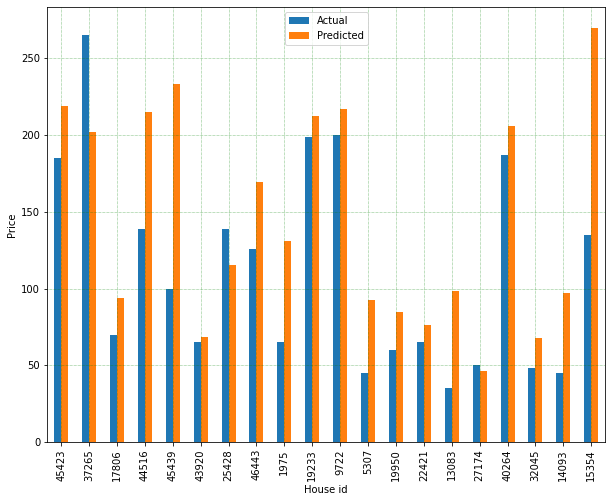

In [ ]:
df2.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle=':', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel("House id")
plt.ylabel("Price")
plt.show()

### Linear Regression

#### Longitude-Price Regression

In this part, we will create a regression model based on the longitude of the house. By using only this information, our model will try to predict the prices of Airbnb houses.

We prepared our data so we can use it in linear regression properly.

In [ ]:
l1 = df['longitude'].values.reshape(-1,1)
y1 = y.values.reshape(-1,1)

We split our data into three parts: Train, Validation and Test.

In [ ]:
l1_train, l1_test, y1_train, y1_test = train_test_split(l1, y1, test_size=0.2, random_state=1)

l1_train, l1_val, y1_train, y1_val = train_test_split(l1_train, y1_train, test_size=0.25, random_state=1)


We created linear regression model and trained it with our train data.

In [ ]:
lr1 = linear_model.LinearRegression()

lr1.fit(l1_train, y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
l1_test = l1_test.reshape(-1,1)

We predicted the prices of houses in the test data set by using our Linear Regression Model.

In [ ]:
y1_pred = lr1.predict(l1_test)
y1_pred

array([[171.23560953],
       [-17.96806297],
       [186.67677754],
       ...,
       [ 85.73655902],
       [144.95008158],
       [168.21056229]])

Below you can see the results of the predictions.

In [ ]:
df_lr1 = pd.DataFrame({'Actual': y1_test.flatten(), 'Predicted': y1_pred.flatten()})
df_lr1

Actual   Predicted
0        145  171.235610
1         42  -17.968063
2         70  186.676778
3        151  144.736828
4         57  136.814837
...      ...         ...
9767     100  184.046645
9768     112  154.356952
9769      35   85.736559
9770      75  144.950082
9771     170  168.210562

[9772 rows x 2 columns]

In [ ]:
l1_test = l1_test.flatten()
l1_test

array([-73.97605, -73.7365 , -73.9956 , ..., -73.8678 , -73.94277,
       -73.97222])

By using different metrics, we measure the success of our model. Later, we will compare it with the results of different models.

In [ ]:
print('Coefficients: \n', lr1.coef_)
# The mean squared error
print('Mean squared error: %.4f'
      %  metrics.mean_squared_error(y1_test, y1_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.4f'
      % metrics.r2_score(y1_test, y1_pred))

Coefficients: 
 [[-789.82956586]]
Mean squared error: 80190.5648
Coefficient of determination: 0.0178


After the result of our multiple linear regression model, we use regularization methods such as Lasso to increase the performance of our models.

training score: 0.015176108395711485
test score:  0.010980151962232898
number of features used:  1
training score for alpha=0.01: 0.023935708783940468
test score for alpha =0.01:  0.017743800395657705
number of features used: for alpha =0.01: 1
training score for alpha=0.0001: 0.023936584743979528
test score for alpha =0.0001:  0.017750316674845834
number of features used: for alpha =0.0001: 1
LR training score: 0.02393658483158445
LR test score:  0.01775037632147225


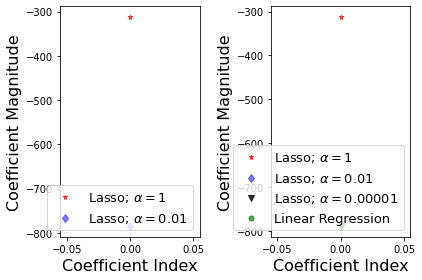

In [ ]:
import math 
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
# difference of lasso and ridge regression is that some of the coefficients can be zero i.e. some of the features are 
# completely neglected
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

l1_test = l1_test.reshape(-1,1)
#print cancer.keys()

#print cancer_df.head(3)
lasso = Lasso()
lasso.fit(l1_train,y1_train)
train_score=lasso.score(l1_train,y1_train)
test_score=lasso.score(l1_test,y1_test)
coeff_used = np.sum(lasso.coef_!=0)
print ("training score:", train_score)
print ("test score: ", test_score)
print ("number of features used: ", coeff_used)
lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(l1_train,y1_train)
train_score001=lasso001.score(l1_train,y1_train)
test_score001=lasso001.score(l1_test,y1_test)
coeff_used001 = np.sum(lasso001.coef_!=0)
print ("training score for alpha=0.01:", train_score001) 
print ("test score for alpha =0.01: ", test_score001)
print ("number of features used: for alpha =0.01:", coeff_used001)
lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso00001.fit(l1_train,y1_train)
train_score00001=lasso00001.score(l1_train,y1_train)
test_score00001=lasso00001.score(l1_test,y1_test)
coeff_used00001 = np.sum(lasso00001.coef_!=0)
print ("training score for alpha=0.0001:", train_score00001) 
print ("test score for alpha =0.0001: ", test_score00001)
print ("number of features used: for alpha =0.0001:", coeff_used00001)
lr = LinearRegression()
lr.fit(l1_train,y1_train)
lr_train_score=lr.score(l1_train,y1_train)
lr_test_score=lr.score(l1_test,y1_test)
print ("LR training score:", lr_train_score)
print ("LR test score: ", lr_test_score)
plt.subplot(1,2,1)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency

plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.subplot(1,2,2)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.plot(lasso00001.coef_,alpha=0.8,linestyle='none',marker='v',markersize=6,color='black',label=r'Lasso; $\alpha = 0.00001$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.7,linestyle='none',marker='o',markersize=5,color='green',label='Linear Regression',zorder=2)
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.tight_layout()
plt.show()


However as you can see above, the Lasso method did not improve our model.

In [ ]:
from sklearn.model_selection import cross_val_score
def get_cv_scores(model):
    scores = cross_val_score(model,
                             X_train,
                             y_train,
                             cv=5,
                             scoring='r2')
    
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')

In [ ]:
get_cv_scores(lr1)

CV Mean:  0.09700291818358327
STD:  0.014444432606806518




Since Lasso regularization method did not improve the performance of our model, we will use a different method called ElasticNet which combines Ridge and Lasso.

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
# Train model with default alpha=1 and l1_ratio=0.5
elastic_net = ElasticNet(alpha=1, l1_ratio=0.5).fit(l1_train, y1_train)
# get cross val scores
get_cv_scores(elastic_net)

### CV Mean:  -0.05139208284143739
### STD:  0.07297997198698156
# find optimal alpha with grid search
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
l1_ratio = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
param_grid = dict(alpha=alpha, l1_ratio=l1_ratio)
grid = GridSearchCV(estimator=elastic_net, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(l1_train, y1_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

CV Mean:  0.05877661892774903
STD:  0.01006992976193068


Fitting 5 folds for each of 77 candidates, totalling 385 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Best Score:  0.024178361644385426
Best Params:  {'alpha': 0.01, 'l1_ratio': 1}


[Parallel(n_jobs=-1)]: Done 344 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 382 out of 385 | elapsed:    2.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 385 out of 385 | elapsed:    2.6s finished


In [ ]:
elastic_net_1 = ElasticNet(alpha=0.01, l1_ratio=1).fit(l1_train, y1_train)

elastic_net_1

get_cv_scores(elastic_net_1)

CV Mean:  0.09700959549738988
STD:  0.014484596706552647




However, as you can see in the above cell this method did not improve the metrics of the model either. But we will still continue with ElasticNet and see if it shows any improvement in the graphs.

In [ ]:
l1_test = l1_test.reshape(-1,1)

In [ ]:
y1_pred_1 = elastic_net_1.predict(l1_test)
y1_pred_1

array([171.12219998, -16.93684988, 186.46995379, ...,  86.14039181,
       144.9956912 , 168.11545333])

In [ ]:
df_lr1_elastic = pd.DataFrame({'Actual': y1_test.flatten(), 'Predicted': y1_pred_1.flatten()})
df_lr1_elastic

Actual   Predicted
0        145  171.122200
1         42  -16.936850
2         70  186.469954
3        151  144.783727
4         57  136.909662
...      ...         ...
9767     100  183.855733
9768     112  154.345653
9769      35   86.140392
9770      75  144.995691
9771     170  168.115453

[9772 rows x 2 columns]

In [ ]:
l1_test = l1_test.flatten()
l1_test

array([-73.97605, -73.7365 , -73.9956 , ..., -73.8678 , -73.94277,
       -73.97222])

We use mean squared error and r^2 to determine the success of the model.

In [ ]:
print('Coefficients: \n', elastic_net_1.coef_)
# The mean squared error
print('Mean squared error: %.4f'
      %  metrics.mean_squared_error(y1_test, y1_pred_1))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.4f'
      % metrics.r2_score(y1_test, y1_pred_1))

Coefficients: 
 [-785.05134571]
Mean squared error: 80191.1017
Coefficient of determination: 0.0177


As you can see above, mean squared error is really high and r^2 is really low. Therefore, it is safe to say that Elastic Net did little or no improvement in our model and this model is performing poorly.

However, we should plot the regression line anyway to really see how it performed.

Text(0.5, 1.0, 'Price / Longitude Regression Model')

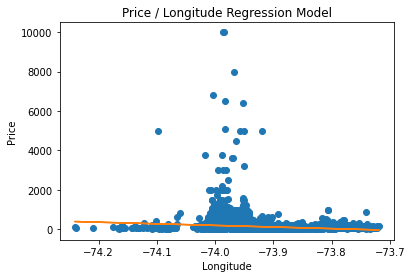

In [ ]:
plt.plot(l1_test, y1_test, 'o')
m, b = np.polyfit(l1_test, y1_test, 1)
plt.plot(l1_test, m*l1_test + b)
plt.xlabel("Longitude")
plt.ylabel("Price")
plt.title("Price / Longitude Regression Model")

As you can see in the plot above, our linear regression line misses most of the data points in our test data.

In [ ]:
df_bar1 = df_lr1_elastic.sample(n=20, random_state = 5)

Also in the bar plot below, we showed some of the actual prices and the prices our model has predicted. Although some of them are close, it is far away from being a well fitted model.

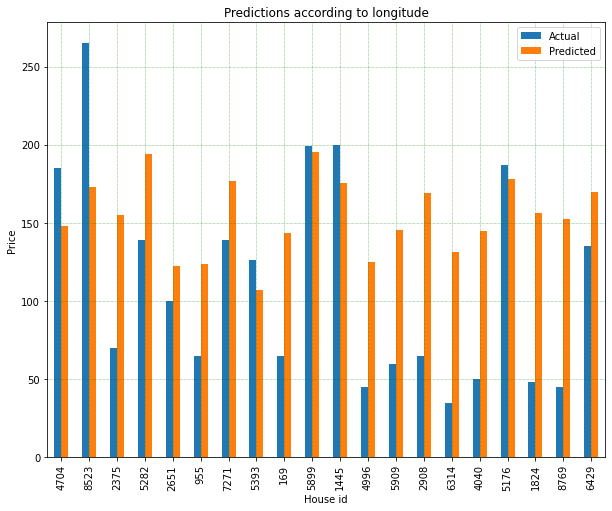

In [ ]:
df_bar1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle=':', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel("House id")
plt.ylabel("Price")
plt.title("Predictions according to longitude")
plt.show()

#### Complaint-Price Regression

In this part, we will create a linear regression model based on the number of crimes commited around a house. By using only this information, our model will try to predict the prices of Airbnb houses.

Since, complaint dataset is really large we will use some part of the data. Therefore, we create sample with n = 1000.

In [ ]:
l2 = complaint_sample['Complaint_amount'].values.reshape(-1,1)
y2 = y.sample(n=1000, random_state = 1)
y2.head()

17801    145
25981     42
15521     70
4341     151
5670      57
Name: price, dtype: int64

We transform the price data into a 1D data.

In [ ]:
y2 = y2.values.reshape(-1,1)

We split the data into 3 parts: Train Data, Validation Data and Test Data

In [ ]:
l2_train, l2_test, y2_train, y2_test = train_test_split(l2, y2, test_size=0.2, random_state=1)

l2_train, l2_val, y2_train, y2_val = train_test_split(l2_train, y2_train, test_size=0.25, random_state=1)

We created a linear regression model and trained it with our train data.

In [ ]:
lr2 = linear_model.LinearRegression()

lr2.fit(l2_train, y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Based on the train data that our model has seen, it predicts the prices of the Airbnb houses in the test data.

In [ ]:
l2_test = l2_test.reshape(-1,1)

In [ ]:
y2_pred = lr2.predict(l2_test)

Below you can see the results of the predictions

In [ ]:
df_lr2 = pd.DataFrame({'Actual': y2_test.flatten(), 'Predicted': y2_pred.flatten()})
df_lr2

Actual   Predicted
0        99  129.190903
1        59  142.765461
2       150  129.869631
3        75  157.018747
4       125  147.516556
..      ...         ...
195      35  125.118536
196     350  132.584543
197      95  162.448570
198     100  146.837828
199      90  129.190903

[200 rows x 2 columns]

In [ ]:
l2_test = l2_test.flatten()


We use mean squared error and r^2 as metrics to measure the performance of our models.

In [ ]:

print('Coefficients: \n', lr2.coef_)
# The mean squared error
print('Mean squared error: %.3f'
      %  metrics.mean_squared_error(y2_test, y2_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.3f'
      % metrics.r2_score(y2_test, y2_pred))

Coefficients: 
 [[0.67872789]]
Mean squared error: 76286.616
Coefficient of determination: 0.005


As you can see above, the r^2 is significantly low meaning that our model is not that successful.

To increase the performance of our model, we use ElasticNet regularization method as we did in the previous example.

In [ ]:
from sklearn.linear_model import ElasticNet
# Train model with default alpha=1 and l1_ratio=0.5
elastic_net = ElasticNet(alpha=1, l1_ratio=0.5).fit(l2_train, y2_train)
# get cross val scores
get_cv_scores(elastic_net)

### CV Mean:  -0.05139208284143739
### STD:  0.07297997198698156
# find optimal alpha with grid search
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
l1_ratio = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
param_grid = dict(alpha=alpha, l1_ratio=l1_ratio)
grid = GridSearchCV(estimator=elastic_net, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(l2_train, y2_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

CV Mean:  0.05877661892774903
STD:  0.01006992976193068


Fitting 5 folds for each of 77 candidates, totalling 385 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Best Score:  -0.001076770097051405
Best Params:  {'alpha': 100, 'l1_ratio': 0}


[Parallel(n_jobs=-1)]: Done 385 out of 385 | elapsed:    0.5s finished
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7081873.478311794, tolerance: 1430.8414598333336
  positive)


We used the best parameters we found above and created a new model as you can see below. By using this model we make new predictions.

In [ ]:
elastic_net_2 = ElasticNet(alpha=100, l1_ratio=0).fit(l2_train, y2_train)


l2_test = l2_test.reshape(-1,1)

y2_pred_1 = elastic_net_2.predict(l2_test)
y2_pred_1

df_lr2_elastic = pd.DataFrame({'Actual': y2_test.flatten(), 'Predicted': y2_pred_1.flatten()})
df_lr2_elastic

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7081873.478311794, tolerance: 1430.8414598333336
  positive)


Actual   Predicted
0        99  132.388080
1        59  144.048829
2       150  132.971117
3        75  156.292616
4       125  148.130091
..      ...         ...
195      35  128.889855
196     350  135.303267
197      95  160.956916
198     100  147.547054
199      90  132.388080

[200 rows x 2 columns]

We use the same metrics to measure the performance of this new improved model.

In [ ]:
print('Coefficients: \n', elastic_net_2.coef_)
# The mean squared error
print('Mean squared error: %.4f'
      %  metrics.mean_squared_error(y2_test, y2_pred_1))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.4f'
      % metrics.r2_score(y2_test, y2_pred_1))

Coefficients: 
 [0.58303747]
Mean squared error: 76303.8806
Coefficient of determination: 0.0043


As you can see above, Elastic Net did not improve the model. In fact it decreased its performance. The r^2 value is lower than before meaning the predictions are more far away than before.

We plot the graph of ElasticNet model. 

Text(0.5, 1.0, 'Price / Complaint Amount Regression Model')

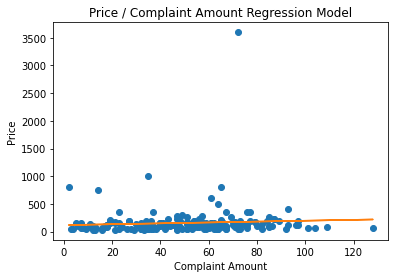

In [ ]:
l2_test = l2_test.flatten()
l2_test
plt.plot(l2_test, y2_test, 'o')
m, b = np.polyfit(l2_test, y2_test, 1)
plt.plot(l2_test, m*l2_test + b)
plt.xlabel("Complaint Amount")
plt.ylabel("Price")
plt.title("Price / Complaint Amount Regression Model")

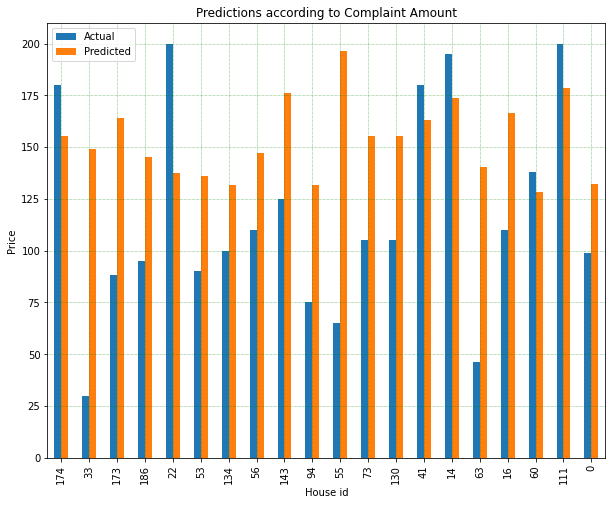

In [ ]:
df_bar2 = df_lr2_elastic.sample(n=20, random_state = 11)

df_bar2.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle=':', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel("House id")
plt.ylabel("Price")
plt.title("Predictions according to Complaint Amount")
plt.show()

#### Distance to Nearest Poi-Price Regression

In this part, we will create a linear regression model based on the distance of a house to the nearest POI. By using only this information, our model will try to predict the prices of Airbnb houses.

We split the data into 3 parts: Train Data, Validation Data and Test Data.
Then we create a new linear regression model and train it with the train data. Based on the data it has seen, our model predicts the prices of Airbnb houses in the test data. Below, you can see the results.

In [ ]:
l3 = df['Dist_Near_POI'].values.reshape(-1,1)
y3 = y.values.reshape(-1,1)

l3_train, l3_test, y3_train, y3_test = train_test_split(l3, y3, test_size=0.2, random_state=1)

l3_train, l3_val, y3_train, y3_val = train_test_split(l3_train, y3_train, test_size=0.25, random_state=1)

lr3 = linear_model.LinearRegression()

lr3.fit(l3_train, y3_train)

y3_pred = lr3.predict(l3_test)


df_lr3 = pd.DataFrame({'Actual': y3_test.flatten(), 'Predicted': y3_pred.flatten()})
df_lr3

Actual   Predicted
0        145  136.868108
1         42  157.279251
2         70  125.581674
3        151  125.658850
4         57  113.130051
...      ...         ...
9767     100  169.723102
9768     112  167.835571
9769      35  167.351646
9770      75  186.880385
9771     170  156.806981

[9772 rows x 2 columns]




We plot the regression line.

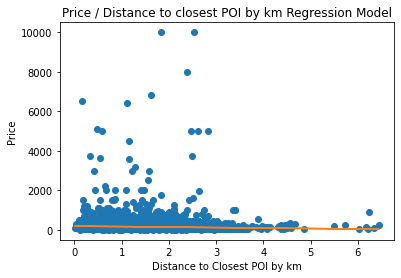

In [ ]:
l3_test = l3_test.flatten()

plt.plot(l3_test, y3_test, 'o')
m, b = np.polyfit(l3_test, y3_test, 1)
plt.plot(l3_test, m*l3_test + b)
plt.xlabel("Distance to Closest POI by km")
plt.ylabel("Price")
plt.title("Price / Distance to closest POI by km Regression Model")
plt.show()


As it can be seen it misses most of the data points.

We also plotted a bar graph to show what was the actual price and what our model predicted.

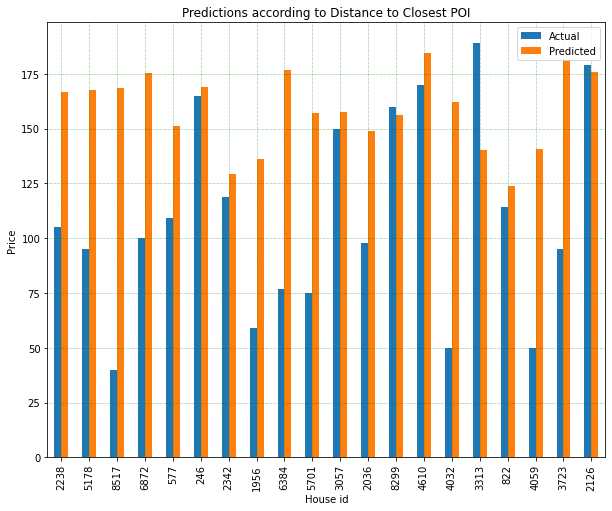

In [ ]:
df_bar3 = df_lr3.sample(n=20, random_state = 2)

df_bar3.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle=':', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel("House id")
plt.ylabel("Price")
plt.title("Predictions according to Distance to Closest POI")
plt.show()

We use mean squared error and r^2 as metrics to measure the performance of our models.

In [ ]:
print('Coefficients: \n', lr3.coef_)
# The mean squared error
print('Mean squared error: %.3f'
      %  metrics.mean_squared_error(y3_test, y3_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.3f'
      % metrics.r2_score(y3_test, y3_pred))

Coefficients: 
 [[-26.06284764]]
Mean squared error: 81322.733
Coefficient of determination: 0.004


As we can see above, our model performs poorly since the r^2 value is significantly low.

#### Distance to Nearest Subway Station - Price Regression

In this part, we will create a linear regression model based on the distance of a house to the nearest subway station. By using only this information, our model will try to predict the prices of Airbnb houses.

We split the data into 3 parts: Train Data, Validation Data and Test Data. Then we create a new linear regression model and train it with the train data. Based on the data it has seen, our model predicts the prices of Airbnb houses in the test data. Below, you can see the results.

In [ ]:
l4 = subway_sample['Dist_to_near_subway'].values.reshape(-1,1)
y4 = y.sample(n = 5000, random_state=23)
y4 = y4.values.reshape(-1,1)

l4_train, l4_test, y4_train, y4_test = train_test_split(l4, y4, test_size=0.2, random_state=1)

l4_train, l4_val, y4_train, y4_val = train_test_split(l4_train, y4_train, test_size=0.25, random_state=1)

lr4 = linear_model.LinearRegression()

lr4.fit(l3_train, y3_train)

y4_pred = lr4.predict(l4_test)


df_lr4 = pd.DataFrame({'Actual': y4_test.flatten(), 'Predicted': y4_pred.flatten()})
df_lr4


Actual   Predicted
0       200  186.848145
1       190  186.912011
2       122  186.471115
3        49  173.257767
4        60  188.244600
..      ...         ...
995      40  188.691707
996      80  184.549574
997      85  184.905324
998     350  183.349996
999      62  183.217696

[1000 rows x 2 columns]

We plot the regression line.

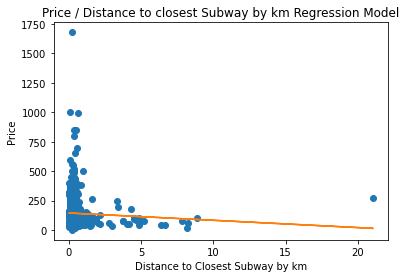

In [ ]:
l4_test = l4_test.flatten()

plt.plot(l4_test, y4_test, 'o')
m, b = np.polyfit(l4_test, y4_test, 1)
plt.plot(l4_test, m*l4_test + b)
plt.xlabel("Distance to Closest Subway by km")
plt.ylabel("Price")
plt.title("Price / Distance to closest Subway by km Regression Model")
plt.show()

As it can be seen it misses most of the data points.

We also plotted a bar graph to show what was the actual price and what our model predicted.

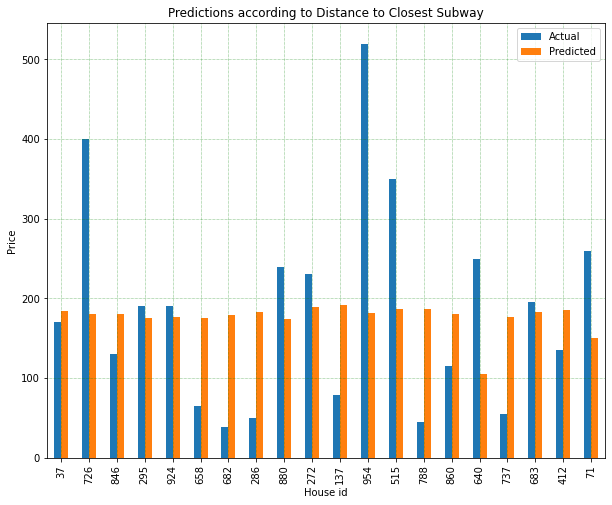

In [ ]:
df_bar4 = df_lr4.sample(n=20, random_state = 2)

df_bar4.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle=':', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel("House id")
plt.ylabel("Price")
plt.title("Predictions according to Distance to Closest Subway")
plt.show()

We use mean squared error and r^2 as metrics to measure the performance of our models.

In [ ]:
print('Coefficients: \n', lr4.coef_)
# The mean squared error
print('Mean squared error: %.4f'
      %  metrics.mean_squared_error(y4_test, y4_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.4f'
      % metrics.r2_score(y4_test, y4_pred))

Coefficients: 
 [[-26.06284764]]
Mean squared error: 16279.5850
Coefficient of determination: -0.1290


As we can see above, our model performs poorly since the r^2 value is significantly low.

#### Distance to Nearest Bus Station - Price Regression

In this part, we will create a linear regression model based on the distance of a house to the nearest bus station. By using only this information, our model will try to predict the prices of Airbnb houses.

We split the data into 3 parts: Train Data, Validation Data and Test Data. Then we create a new linear regression model and train it with the train data. Based on the data it has seen, our model predicts the prices of Airbnb houses in the test data. Below, you can see the results.

In [ ]:
l5 = bus_sample['Dist_to_near_bus'].values.reshape(-1,1)
y5 = y.sample(n = 1000, random_state = 1)
y5 = y5.values.reshape(-1,1)

l5_train, l5_test, y5_train, y5_test = train_test_split(l5, y5, test_size=0.2, random_state=1)

l5_train, l5_val, y5_train, y5_val = train_test_split(l5_train, y5_train, test_size=0.25, random_state=1)

lr5 = linear_model.LinearRegression()

lr5.fit(l5_train, y5_train)

y5_pred = lr5.predict(l5_test)



df_lr5 = pd.DataFrame({'Actual': y5_test.flatten(), 'Predicted': y5_pred.flatten()})
df_lr5

Actual   Predicted
0        99  139.389900
1        59  152.734003
2       150  152.615685
3        75  157.214682
4       125  142.787847
..      ...         ...
195      35  146.427386
196     350  155.128316
197      95  160.113802
198     100  157.185714
199      90  132.325867

[200 rows x 2 columns]

We plot the regression line.

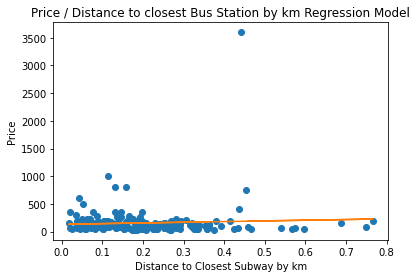

In [ ]:
l5_test = l5_test.flatten()

plt.plot(l5_test, y5_test, 'o')
m, b = np.polyfit(l5_test, y5_test, 1)
plt.plot(l5_test, m*l5_test + b)
plt.xlabel("Distance to Closest Subway by km")
plt.ylabel("Price")
plt.title("Price / Distance to closest Bus Station by km Regression Model")
plt.show()

As it can be seen it misses most of the data points.

We also plotted a bar graph to show what was the actual price and what our model predicted.

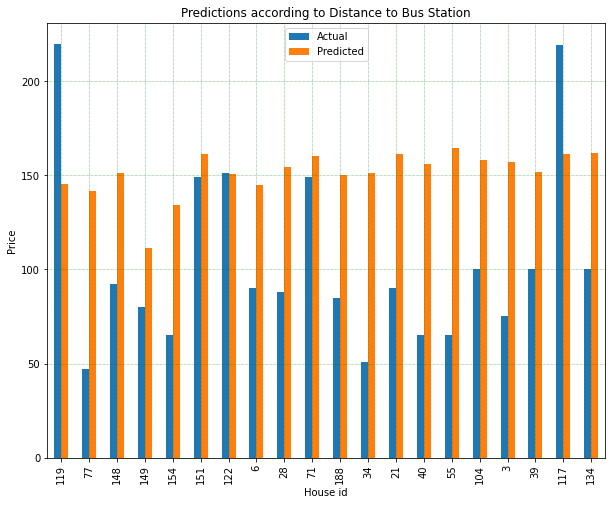

In [ ]:
df_bar5 = df_lr5.sample(n=20, random_state = 5)

df_bar5.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle=':', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel("House id")
plt.ylabel("Price")
plt.title("Predictions according to Distance to Bus Station")
plt.show()

We use mean squared error and r^2 as metrics to measure the performance of our models.

In [ ]:
print('Coefficients: \n', lr5.coef_)
# The mean squared error
print('Mean squared error: %.4f'
      %  metrics.mean_squared_error(y5_test, y5_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.4f'
      % metrics.r2_score(y5_test, y5_pred))

Coefficients: 
 [[-72.86637516]]
Mean squared error: 77080.4007
Coefficient of determination: -0.0058


As we can see above, our model performs poorly since the r^2 value is significantly low.



```
# Bu, kod olarak biçimlendirilmiştir
```

### Random Forest

In this part, we will create a random forest regression model based on the data frame that includes all the features. By using all of the information, our model will try to predict the prices of Airbnb houses.

We split the data into 3 parts: Train Data, Validation Data and Test Data. 

In [ ]:
df_rf = df_lr
y_rf = df['price']
rf_train, rf_test, y_rf_train, y_rf_test = train_test_split(df_rf, y_rf, test_size=0.2, random_state=1)

rf_train, rf_val, y_rf_train, y_rf_val = train_test_split(rf_train, y_rf_train, test_size=0.25, random_state=1)


Then we create a new random forest regression model and train it with the train data. Based on the data it has seen, our model predicts the prices of Airbnb houses in the test data.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
regressor.fit(df_rf, y_rf)  

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

Below you can see the results of the prediction.

In [ ]:

y_rf_pred = regressor.predict(rf_test)
df_of_rf=pd.DataFrame({'Actual':y_rf_test, 'Predicted':y_rf_pred})
df_of_rf
df_of_rf 

Actual  Predicted
17801     145     125.17
25981      42      43.16
15521      70      77.60
4341      151     166.00
5670       57      62.43
...       ...        ...
42072     100     120.46
6477      112     116.41
28814      35      45.71
5892       75      79.24
33466     170     174.86

[9772 rows x 2 columns]

We use Mean Absolute Error, Mean Squared Error, Root Mean Squared Error and r^2 as metrics to measure the performance of our models.

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, r2_score
print('Mean Absolute Error:', metrics.mean_absolute_error(y_rf_test, y_rf_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_rf_test, y_rf_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_rf_test, y_rf_pred)))
print('R-square score of Random Forest Regression for training: ', metrics.r2_score(y_rf_test, y_rf_pred))
errors = abs(y_rf_pred - y_rf_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')






Mean Absolute Error: 26.586698219402376
Mean Squared Error: 11333.312050475566
Root Mean Squared Error: 106.4580295256096
R-square score of Random Forest Regression for training:  0.8611789114811875
Mean Absolute Error: 26.59 degrees.


As you can see above our r^2 is really high and the error measurements are really low. From this we can say that this is our best model so far. 

Since we couldn't plot a scatter plot, instead we plotted a bar graph to show what was the actual price and what our model predicted. As you can see, our model performed very well.

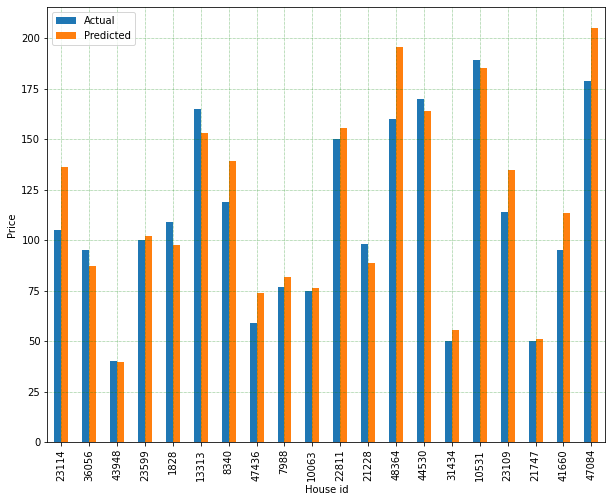

In [ ]:
df_sample_rf = df_of_rf.sample(n=20, random_state = 2)
df_sample_rf.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle=':', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel("House id")
plt.ylabel("Price")
plt.show()

To increase the performance of our model, we will use one of the HyperParameter Tuning techniques called RandomizedSearchCV.

In [ ]:
print('Parameters currently in use:\n')
print(regressor.get_params())

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}


RandomizedSearchCV will go through different parameters and try them one by one to see which combination increases the performance of the model. 

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [10, 57, 105, 152, 200]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter =3, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(df_rf, y_rf)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  2.3min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

Below, it shows the best parameters to use to increase the performance of the model.

In [ ]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 10}

In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
    
y_rf_test[y_rf_test==0]=1

base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(df_rf, y_rf)
base_accuracy = evaluate(base_model, rf_test, y_rf_test)

best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, rf_test, y_rf_test)

Model Performance
Average Error: 29.0155 degrees.
Accuracy = 80.16%.
Model Performance
Average Error: 59.8954 degrees.
Accuracy = 55.81%.


However, after using the best parameters suggested by RandomizedSearchCV we see that our accuracy has decreased and our errors increased. Therefore we decide to go with the default parameter.

### Decision Tree Regression

In this part, we will create a decision tree regression model based on the data frame that includes all the features. By using all of the information, our model will try to predict the prices of Airbnb houses.

In [ ]:
df_dt = df_lr
df_dt.head()

neighbourhood_group  neighbourhood  ...  availability_365  Dist_Near_POI
0                    1            108  ...               365       1.555002
1                    2            127  ...               355       0.516936
2                    2             94  ...               365       0.621773
3                    1             41  ...               194       1.773661
4                    2             61  ...                 0       0.561297

[5 rows x 11 columns]

When we found names that containing the word "lux", we also created a list of binaries. Below, we are adding a column to df_dt according to existence of the word "lux".

In [ ]:
df_dt['lux_bin']=new_col_for_lux
y_dt = df['price']

We split the data into 3 parts: Train Data, Validation Data and Test Data.

In [ ]:
dt_train, dt_test, y_dt_train, y_dt_test = train_test_split(df_dt, y_dt, test_size=0.2, random_state=1)

dt_train, dt_val, y_dt_train, y_dt_val = train_test_split(dt_train, y_dt_train, test_size=0.25, random_state=1)

Then we create a new random forest regression model and train it with the train data. Based on the data it has seen, our model predicts the prices of Airbnb houses in the test data.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(dt_train, y_dt_train)
y_dt_pred = dt_regressor.predict(dt_test)

Below, you can see the results.

In [ ]:
df_dt_pred = pd.DataFrame({'Real Values':y_dt_test, 'Predicted Values':y_dt_pred})
df_dt_pred

Real Values  Predicted Values
17801          145             105.0
25981           42              80.0
15521           70              80.0
4341           151             115.0
5670            57              77.0
...            ...               ...
42072          100             180.0
6477           112              75.0
28814           35              90.0
5892            75              41.0
33466          170             185.0

[9772 rows x 2 columns]

Since we couldn't plot a scatter plot, instead we plotted a bar graph to show what was the actual price and what our model predicted. As you can see, our model performed very well.

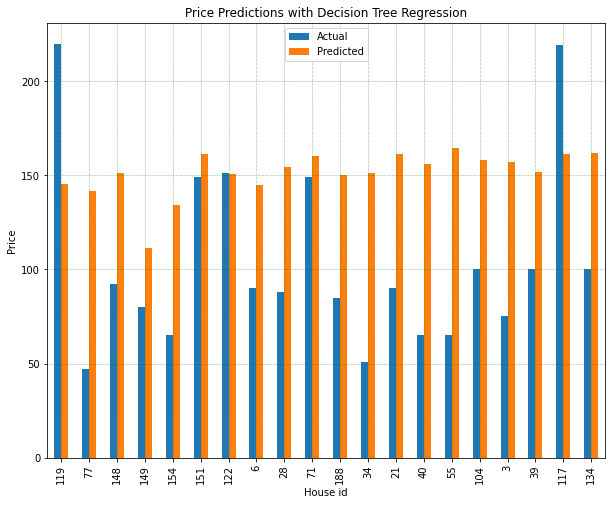

In [ ]:
df_bar6 = df_dt_pred.sample(n=20, random_state = 5)

df_bar5.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle=':', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel("House id")
plt.ylabel("Price")
plt.title("Price Predictions with Decision Tree Regression")
plt.show()

We use Mean  Mean Squared Error and r^2 as metrics to measure the performance of our models.

In [ ]:
# The mean squared error
print('Mean squared error: %.4f'
     % metrics.mean_squared_error(y_dt_test, y_dt_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.4f'
      % metrics.r2_score(y_dt_test, y_dt_pred))

Mean squared error: 118229.2299
Coefficient of determination: -0.4482


As we can see above, our model performs poorly since the r^2 value is significantly low. It's actually negative.

## Summary

**RESULTS**

We mentioned the results in our Machine Learning part, to sum it up we used:

Multiple Linear Regression

Linear Regression

Random Forest Regression

Decision Tree Regression


| **ML Methods**  | **Extra Algorithms?** | **R-square** | **Accuracies** | **MSE** |
| ---             |   ---                 |  ---         | ---        | --- |
| `Linear Regression` | Elastic | 0.0178 | - | 80190.5648 |
| `Multiple Linear Regression` | Lasso | 0.06893904373023829 | - | 76011.53735363073 | 
| `Random Forest Regressor` | RandomizeSearchCV (Hyper Parameter Tuning)  | 0.8612 | 80.16% | 11333.312050475566 |
| `Desicion Tree Regression` | No | -0.4482 | - | 118229.2299 |



Looking at the above table we can clearly see the answer of our first sub-question: “What machine learning method we should use to get the best possible results?”. **Random Forest Regression** gives the best accuracy with the default paramaters even though we tried to increase its performance by using HyperParamater tuning techniques.

Answers to our hypothesis questions are all the same, every feature selected for hypothesis testing (neighbourhood group, longitude, latitude) is **important** in the determination of price. However, machine learning models that only use one of these features can't predict the price accurately. Therefore, a model who uses all of the features together would be more useful. That is one of the reasons why we chose **Random Forest Regression** as the most effective model.


More details and every observation in our project are explained step-by-step in the related part of our project.

---




**DISCUSSION**

As we mentioned in the Machine Learning part of the project, Linear Regression models did not perform very well. The reason for that is the fact that standart linear regression models only consider one feature. In our project, we used features like longitude, complaint number and distance to closest POI. Even though these features are all important for predicting the price of the Airbnb house, they are not as important when they are considered alone. Also, there are some relations between price and some of these features that a linear model would not be able to show. For example, the relation between price and distance to nearest subway station.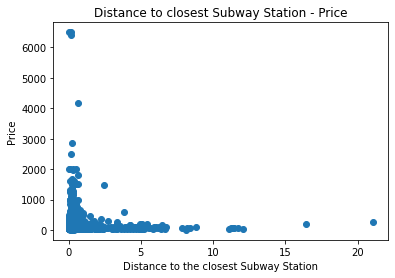

As you can see above, a linear regression is not capable of accurately explaining this relation. Therefore, a better idea would have been to use nonlinear regression or to use a multi-feature model as we did in our project.

**CONCLUSION**


--> As the accuracy showed the best method to use is Random Forest Regression without parameter tuning.

--> Every feature selected for hypothesis testing (neighbourhood group, longitude, latitude) is important in the determination of price.

--> Even though the features are important, using them in a connected manner gives a better result for prediction models 


---


